In [1]:
#pip install --upgrade vnstock

In [1]:
import vnstock as vn
from datetime import datetime 
from dateutil.relativedelta import relativedelta

import numpy as np
import pandas as pd
import pandas_ta as ta
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = vn.listing_companies()

In [3]:
df.head()

ticker comGroupCode                                          organName  \
0    SSI         HOSE                    Công ty Cổ phần Chứng khoán SSI   
1    BCM         HOSE  Tổng Công ty Đầu tư và Phát triển Công nghiệp ...   
2    VHM         HOSE                           Công ty Cổ phần Vinhomes   
3    VIC         HOSE                     Tập đoàn Vingroup - Công ty CP   
4    VRE         HOSE                      Công ty Cổ phần Vincom Retail   

    organShortName organTypeCode comTypeCode               icbName  \
0  Chứng khoán SSI            DN          CK  Môi giới chứng khoán   
1      Becamex IDC            DN          CT          Bất động sản   
2         Vinhomes            DN          CT          Bất động sản   
3         VinGroup            DN          CT          Bất động sản   
4    Vincom Retail            DN          CT          Bất động sản   

                                         icbNamePath     sector  \
0  Tài chính/Dịch vụ tài chính/Dịch vụ tài chính/...  Tài chính   
1   Tài chính/Bất động sản/Bất động sản/Bất động sản  Tài chính   
2   Tài chính/Bất động sản/Bất động sản/Bất động sản  Tài chính   
3   Tài chính/Bất động sản/Bất động sản/Bất động sản  Tài chính   
4   Tài chính/Bất động sản/Bất động sản/Bất động sản  Tài chính   

            industry              group              subgroup  icbCode  VN30  \
0  Dịch vụ tài chính  Dịch vụ tài chính  Môi giới chứng khoán     8777  True   
1       Bất động sản       Bất động sản          Bất động sản     8633  True   
2       Bất động sản       Bất động sản          Bất động sản     8633  True   
3       Bất động sản       Bất động sản          Bất động sản     8633  True   
4       Bất động sản       Bất động sản          Bất động sản     8633  True   

   VNMID  VN100  VNSML  VNALL  HNX30  VNX50  VNXALL  VNDIAMOND  VNFINLEAD  \
0  False   True  False   True  False   True    True      False       True   
1  False   True  False   True  False  False   False      False      False   
2  False   True  False   True  False   True    True      False      False   
3  False   True  False   True  False   True    True      False      False   
4  False   True  False   True  False   True    True      False      False   

   VNFINSELECT   VNSI  VNCOND  VNCONS  VNENE  VNFIN  VNHEAL  VNIND   VNIT  \
0         True  False   False   False  False   True   False  False  False   
1        False  False   False   False  False  False   False  False  False   
2        False  False   False   False  False  False   False  False  False   
3        False   True   False   False  False  False   False  False  False   
4        False  False   False   False  False  False   False  False  False   

   VNMAT  VNREAL  VNUTI  
0  False   False  False  
1  False    True  False  
2  False    True  False  
3  False    True  False  
4  False    True  False

In [4]:
unique_industries = df['industry'].unique()
unique_industries

array(['Dịch vụ tài chính', 'Bất động sản', 'Bảo hiểm',
       'Điện, nước & xăng dầu khí đốt', 'Ngân hàng', 'Tài nguyên Cơ bản',
       'Hóa chất', 'Thực phẩm và đồ uống', 'Du lịch và Giải trí',
       'Bán lẻ', 'Dầu khí', 'Công nghệ Thông tin', 'Viễn thông',
       'Ô tô và phụ tùng', 'Hàng cá nhân & Gia dụng', 'Truyền thông',
       'Y tế', 'Xây dựng và Vật liệu', 'Hàng & Dịch vụ Công nghiệp'],
      dtype=object)

In [5]:
financial_services_companies = df[df['industry'] == 'Dịch vụ tài chính']

unique_financial_icbNames = financial_services_companies['icbName'].unique()

unique_financial_icbNames

array(['Môi giới chứng khoán', 'Quỹ đầu tư', 'Tài chính đặc biệt',
       'Quản lý tài sản', 'Tài chính cá nhân'], dtype=object)

In [6]:
brokerage_companies = df[df['icbName'] == 'Môi giới chứng khoán']

unique_comGroupCodes = brokerage_companies['comGroupCode'].unique()

unique_comGroupCodes

array(['HOSE', 'UPCOM', 'HNX'], dtype=object)

In [7]:
#filtered_companies = df[(df['comGroupCode'].isin(['HOSE', 'HNX'])) & (df['icbName'] == 'Môi giới chứng khoán')]
filtered_companies = df[(df['icbName'] == 'Môi giới chứng khoán')]
filtered_companies

ticker comGroupCode                                          organName  \
0     SSI         HOSE                    Công ty Cổ phần Chứng khoán SSI   
55    ABW        UPCOM                Công ty Cổ phần Chứng khoán An Bình   
56    AGR         HOSE               Công ty Cổ phần Chứng khoán AGRIBANK   
57    APG         HOSE                    Công ty Cổ phần Chứng khoán APG   
58    APS          HNX  Công ty Cổ phần Chứng khoán Châu Á - Thái Bình...   
60    BMS        UPCOM               Công ty Cổ phần Chứng khoán Bảo Minh   
61    BSI         HOSE                   Công ty Cổ phần Chứng khoán BIDV   
62    BVS          HNX               Công ty Cổ phần Chứng khoán Bảo Việt   
64    CTS         HOSE  Công ty Cổ phần Chứng khoán Ngân hàng Công thư...   
65    DSC        UPCOM                    Công ty Cổ phần Chứng khoán DSC   
68    ART        UPCOM                    Công ty Cổ phần Chứng khoán BOS   
69    FTS         HOSE                    Công ty Cổ phần Chứng khoán FPT   
70    AAS        UPCOM            Công ty Cổ phần Chứng khoán SmartInvest   
71    HBS          HNX               Công ty Cổ phần Chứng khoán Hòa Bình   
72    HCM         HOSE  Công ty Cổ phần Chứng khoán Thành phố Hồ Chí Minh   
73    HAC        UPCOM              Công ty Cổ phần Chứng khoán Hải Phòng   
75    IVS          HNX  Công ty Cổ phần Chứng khoán Guotai Junan (Việt...   
76    EVS          HNX                Công ty Cổ phần Chứng khoán Everest   
78    ORS         HOSE             Công ty Cổ phần Chứng khoán Tiên Phong   
79    CSI        UPCOM    Công ty Cổ phần Chứng khoán Kiến thiết Việt Nam   
80    PHS        UPCOM               Công ty Cổ phần Chứng khoán Phú Hưng   
81    PSI          HNX                Công ty Cổ phần Chứng khoán Dầu khí   
82    SBS        UPCOM                    Công ty Cổ phần Chứng khoán SBS   
83    SHS          HNX       Công ty Cổ phần Chứng khoán Sài Gòn - Hà Nội   
84    TCI        UPCOM             Công ty Cổ phần Chứng khoán Thành Công   
85    MBS          HNX                     Công ty Cổ phần Chứng khoán MB   
86    TVB         HOSE               Công ty Cổ phần Chứng khoán Trí Việt   
88    TVS         HOSE             Công ty Cổ phần Chứng khoán Thiên Việt   
89    VCI         HOSE                Công ty Cổ phần Chứng khoán Vietcap   
90    VDS         HOSE              Công ty Cổ phần Chứng khoán Rồng Việt   
91    VFS          HNX              Công ty Cổ phần Chứng khoán Nhất Việt   
92    VUA        UPCOM       Công ty Cổ phần Chứng khoán Stanley Brothers   
93    VIG          HNX  Công ty Cổ phần Chứng khoán Đầu tư Tài chính V...   
94    VIX         HOSE                    Công ty Cổ phần Chứng khoán VIX   
95    VND         HOSE               Công ty Cổ phần Chứng khoán VNDIRECT   
96    WSS          HNX               Công ty Cổ phần Chứng khoán Phố Wall   

                           organShortName organTypeCode comTypeCode  \
0                         Chứng khoán SSI            DN          CK   
55                    Chứng khoán An Bình            DN          CK   
56                               Agriseco            DN          CK   
57                        Chứng khoán APG            DN          CK   
58                        CK Châu Á - TBD            DN          CK   
60                   Chứng khoán Bảo Minh            DN          CK   
61                       Chứng khoán BIDV            DN          CK   
62                   Chứng khoán Bảo Việt            DN          CK   
64                 Chứng khoán Vietinbank            DN          CK   
65                        Chứng khoán DSC            DN          CK   
68                        Chứng khoán BOS            DN          CK   
69                        Chứng khoán FPT            DN          CK   
70                Chứng khoán SmartInvest            DN          CK   
71                   Chứng khoán Hòa Bình            DN          CK   
72                        Chứng khoán HSC            DN          CK   
73               

In [8]:
stocklist = filtered_companies.ticker
stockname = filtered_companies.organShortName

In [9]:
stock_list = stocklist.tolist()
print(stock_list)
print(len(stock_list))
stock_string = ', '.join(stock_list)
print(stock_string)


['SSI', 'ABW', 'AGR', 'APG', 'APS', 'BMS', 'BSI', 'BVS', 'CTS', 'DSC', 'ART', 'FTS', 'AAS', 'HBS', 'HCM', 'HAC', 'IVS', 'EVS', 'ORS', 'CSI', 'PHS', 'PSI', 'SBS', 'SHS', 'TCI', 'MBS', 'TVB', 'TVS', 'VCI', 'VDS', 'VFS', 'VUA', 'VIG', 'VIX', 'VND', 'WSS']
36
SSI, ABW, AGR, APG, APS, BMS, BSI, BVS, CTS, DSC, ART, FTS, AAS, HBS, HCM, HAC, IVS, EVS, ORS, CSI, PHS, PSI, SBS, SHS, TCI, MBS, TVB, TVS, VCI, VDS, VFS, VUA, VIG, VIX, VND, WSS


In [10]:
compare_data = vn.stock_ls_analysis(stock_string).T.reset_index()
compare_data

Mã CP Vốn hóa (tỷ)    Giá Số phiên tăng/giảm liên tiếp    P/E  P/B  \
0    ABW          888  11807                            2   28.1  0.9   
1    APS          548   6600                           -1   -1.7  0.7   
2    ART          126  16300                            0   46.6  1.4   
3    BSI         7484  37000                           -1   20.8  1.6   
4    CSI          489  29126                            2  566.2  2.7   
5    CTS         3309  22250                            3   21.8  1.6   
6    DSC         3356  16385                            2   30.6  1.5   
7    EVS         1269   7700                           -1   11.2  0.7   
8    FTS         7724  36000                           -1   15.6  2.1   
9    HBS          238   7200                            0   14.6  0.6   
10   IVS          617   8900                           -1   24.6  0.8   
11   MBS         8053  18400                           -1   16.7  1.7   
12   ORS         3090  15450                            3   19.8  1.2   
13   PHS         1575  10500                            2   34.1  1.0   
14   SHS        12441  15300                           -1   23.8  1.2   
15   TVB          559   4990                            3   47.3  0.6   
16   TVS         3034  20050                            0   11.1  1.5   
17   VFS         2472  20600                            2   30.1  1.7   
18   VIX         9138  13650                            0   13.6  1.1   
19   VND        22530  18500                           -1   19.3  1.4   

   EV/EBITDA Cổ tức    ROE    ROA Thanh toán hiện hành Thanh toán nhanh  \
0       17.7    0.0  0.033   0.02                  1.8              1.8   
1       -0.9    0.0 -0.336  -0.33                 56.0             56.0   
2        2.8    0.0   0.03  0.029                 81.0             81.0   
3       16.6  0.032  0.081  0.046                  2.2              2.2   
4       60.6    0.0  0.005  0.005                154.6            154.6   
5       17.2    0.0  0.078  0.022                  1.3              1.3   
6       17.9    0.0  0.067  0.037                  2.2              2.2   
7        8.2    0.0   0.06  0.047                  6.5              6.5   
8       15.5    0.0  0.144  0.073                  1.9              1.9   
9       10.9    0.0   0.04   0.04                109.1            109.1   
10      19.8    0.0  0.034  0.033                 31.7             31.7   
11      15.4    0.0  0.111   0.04                  1.5              1.5   
12       3.9    0.0  0.065  0.023                  4.4              4.4   
13      15.7  0.014  0.029  0.011                  1.6              1.6   
14      15.4    0.0  0.053  0.047                 17.0             17.0   
15      14.7    0.0  0.011   0.01                117.3            117.3   
16       6.0    0.0  0.145  0.027                  0.8              0.8   
17      22.1    0.0  0.068  0.067                 78.6             78.6   
18       8.4    0.0  0.081  0.079                 98.1             98.1   
19      13.6    0.0  0.077  0.028                  1.6              1.6   

   Nợ/Vốn CSH Nợ/EBITDA Doanh thu quý gần nhất   RSI    RS  
0         0.6       6.9                  0.459  31.5  27.0  
1         0.0       0.0                 -0.801  45.8   3.0  
2         0.0       0.0                  0.459   0.0  34.0  
3         0.7       4.9                   0.22  48.1  81.0  
4         0.0       0.0                 -0.016  23.1   8.0  
5         2.8       9.0                 -0.325  42.5  58.0  
6         0.8       5.4                 -0.029  39.4  28.0  
7         0.1       1.5                  1.147  42.4  33.0  
8         0.7       2.9                  0.251  42.5  72.0  
9         0.0       0.0                 -0.304  40.0  11.0  
10        0.0       0.4                 -0.139  42.2  51.0  
11        1.5       7.1                  0.344  43.4  69.0  
12        0.3       0.9                 -0.317  45.2  65.0  
13        1.4       9.5                

We can see that in the list of securities companies, there are a total of 36 companies, but in the 'compare_data' list, there are only 19 companies.

The reason is that, according to the 'vnstock' package, missing data will be omitted.

In [11]:
vn.industry_analysis("VCI").T.reset_index()

Mã CP Vốn hóa (tỷ)    Giá Số phiên tăng/giảm liên tiếp   P/E  PEG  P/B  \
0    VCI        16406  37500                            3  41.3 -0.6  2.3   
1    SSI        43325  28900                            0  21.5 -1.4  1.9   
2    VND        22530  18500                           -1  19.3 -0.4  1.4   
3    SHS        12441  15300                           -1  23.8 -2.1  1.2   
4    HCM        12345  27000                           -1  19.9 -0.6  1.5   
5    VIX         9138  13650                            0  13.6  0.8  1.1   
6    MBS         8053  18400                           -1  16.7 -0.8  1.7   
7    FTS         7724  36000                           -1  15.6  0.7  2.1   
8    BSI         7484  37000                           -1  20.8  0.2  1.6   
9    DSC         3356  16385                            2  30.6  0.2  1.5   
10   CTS         3309  22250                            3  21.8 -0.5  1.6   
11   ORS         3090  15450                            3  19.8 -1.0  1.2   
12   TVS         3034  20050                            0  11.1  0.3  1.5   
13   VDS         2972  14150                           -1  11.1  0.0  1.3   
14   AGR         2897  13450                            3  18.5 -1.4  1.2   
15   AAS         1726   8632                            3  15.4 -0.2  0.7   
16   PHS         1575  10500                            2  34.1 -0.8  1.0   
17   APG         1458   9490                           -1 -25.2  0.2  0.9   
18   EVS         1269   7700                           -1  11.2 -0.2  0.7   
19   SBS          952   6495                            3 -13.5  0.0  2.7   

   EV/EBITDA Cổ tức    ROE    ROA Thanh toán hiện hành Thanh toán nhanh  \
0       19.2    0.0  0.057  0.024                  1.8              1.8   
1       18.0  0.059   0.09   0.04                  1.6              1.6   
2       13.6    0.0  0.077  0.028                  1.6              1.6   
3       15.4    0.0  0.053  0.047                 17.0             17.0   
4       22.1  0.039  0.077  0.033                  1.9              1.9   
5        8.4    0.0  0.081  0.079                 98.1             98.1   
6       15.4    0.0  0.111   0.04                  1.5              1.5   
7       15.5    0.0  0.144  0.073                  1.9              1.9   
8       16.6  0.032  0.081  0.046                  2.2              2.2   
9       17.9    0.0  0.067  0.037                  2.2              2.2   
10      17.2    0.0  0.078  0.022                  1.3              1.3   
11       3.9    0.0  0.065  0.023                  4.4              4.4   
12       6.0    0.0  0.145  0.027                  0.8              0.8   
13      12.1    0.0  0.142  0.053                  1.8              1.8   
14      15.1  0.083  0.063  0.053                  4.1              4.1   
15      21.6    0.0  0.057  0.043                  4.3              4.3   
16      15.7  0.014  0.029  0.011                  1.6              1.6   
17     -36.0    0.0 -0.034 -0.032                 35.6             35.6   
18       8.2    0.0   0.06  0.047                  6.5              6.5   
19     -19.0    0.0 -0.184 -0.135                  2.3              2.3   

   Biên LNG Biên LNST Nợ/Vốn CSH Nợ/EBITDA LNST 5 năm Doanh thu 5 năm  \
0     0.597     0.268        1.2       6.2      0.058           0.155   
1     0.664     0.366        1.3       6.4      0.079           0.169   
2     0.704     0.363        1.4       6.4      0.205           0.411   
3     0.572     0.411        0.0       0.7     -0.152           0.072   
4      0.43      0.26        1.0      11.8       0.09           0.205   
5      0.79     0.617        0.0       0.0      0.318           0.251   
6     0.679     0.308        1.5       7.1      0.846           0.185   
7      0.71     0.565        0.7       2.9      0.122           0.219   
8     0.616     0.318        0.7       4.9     -0.085           0.139   
9     0.703     0.318        0.8       5.4      0.259           0.541   
10    

In [12]:
vonnhoa_list = []
p_b_list = []
for stock_code in stock_list:
   
    d = vn.industry_analysis(stock_code).T.reset_index()
    vonnhoa = d[(d["Mã CP"] == stock_code)]["Vốn hóa (tỷ)"].values[0]
    p_b = d[(d["Mã CP"] == stock_code)]["P/B"].values[0]
  
    vonnhoa_list.append(vonnhoa) 
    p_b_list.append(p_b)

In [13]:
dfr = pd.DataFrame({'Mã CP': stock_list, 
                    'Vốn hóa (tỷ)': vonnhoa_list, 
                    'P/B': p_b_list
                   })
dfr

Mã CP  Vốn hóa (tỷ)  P/B
0    SSI       43325.0  1.9
1    ABW         888.0  0.9
2    AGR        2897.0  1.2
3    APG        1458.0  0.9
4    APS         548.0  0.7
5    BMS         612.0  0.7
6    BSI        7484.0  1.6
7    BVS        1704.0  0.7
8    CTS        3309.0  1.6
9    DSC        3356.0  1.5
10   ART         126.0  1.4
11   FTS        7724.0  2.1
12   AAS        1726.0  0.7
13   HBS         238.0  0.6
14   HCM       12345.0  1.5
15   HAC           NaN  NaN
16   IVS         617.0  0.8
17   EVS        1269.0  0.7
18   ORS        3090.0  1.2
19   CSI         489.0  2.7
20   PHS        1575.0  1.0
21   PSI         503.0  0.7
22   SBS         952.0  2.7
23   SHS       12441.0  1.2
24   TCI        1014.0  0.8
25   MBS        8053.0  1.7
26   TVB         559.0  0.6
27   TVS        3034.0  1.5
28   VCI       16406.0  2.3
29   VDS        2972.0  1.3
30   VFS        2472.0  1.7
31   VUA        1038.0  3.5
32   VIG         302.0  0.9
33   VIX        9138.0  1.1
34   VND       22530.0  1.4
35   WSS         312.0  0.6

In [14]:
dfr = dfr.dropna()
print(len(dfr))

35


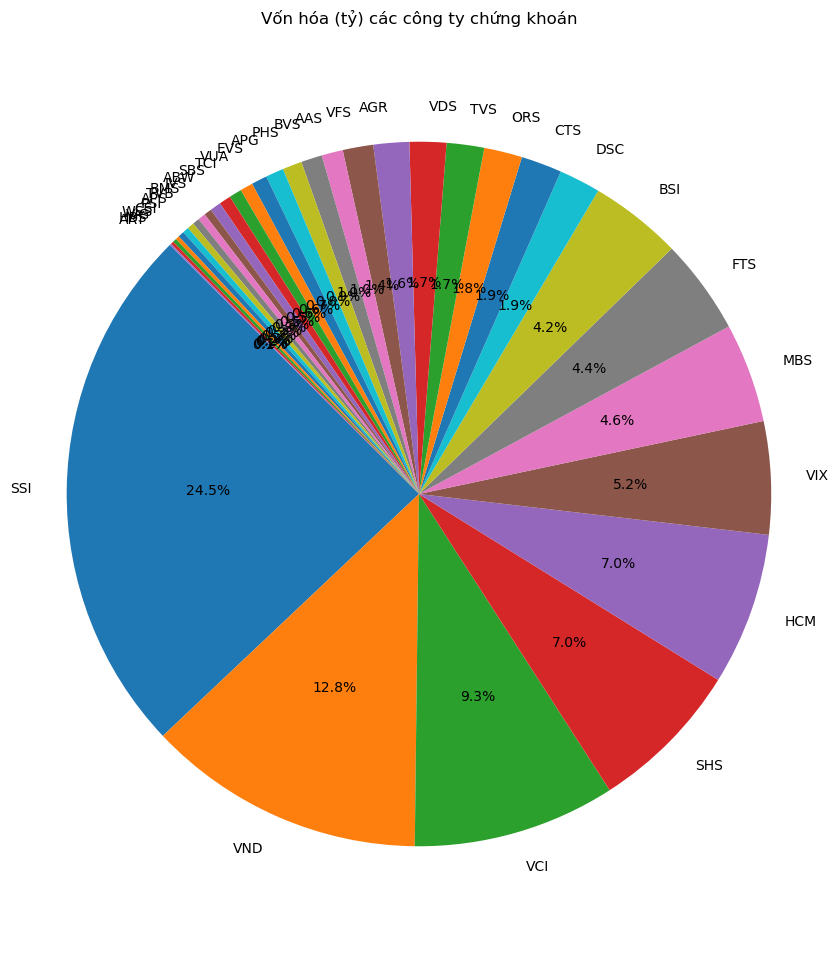

In [15]:
# Sắp xếp dữ liệu từ lớn đến bé
dfr_sorted = dfr.sort_values(by='Vốn hóa (tỷ)', ascending=False)

# Vẽ biểu đồ pie chart
plt.figure(figsize=(10, 12))
plt.pie(dfr_sorted["Vốn hóa (tỷ)"], labels=dfr_sorted["Mã CP"], autopct='%1.1f%%', startangle=135)
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.title('Vốn hóa (tỷ) các công ty chứng khoán')
plt.show()


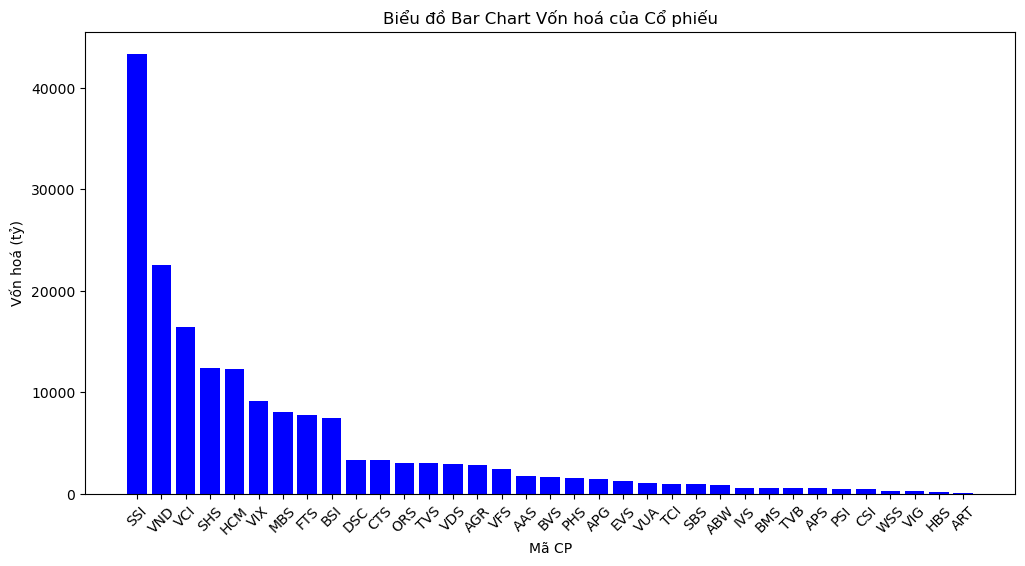

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))

 
bar1 = ax.bar(dfr_sorted['Mã CP'], dfr_sorted['Vốn hóa (tỷ)'], label='Vốn hoá (tỷ)', color='blue')

ax.set_ylabel('Vốn hoá (tỷ)')
ax.set_xlabel('Mã CP')
ax.set_title('Biểu đồ Bar Chart Vốn hoá của Cổ phiếu')
ax.set_xticks(dfr_sorted['Mã CP'])
ax.set_xticklabels(dfr_sorted['Mã CP'], rotation=45)
ax.tick_params(axis='x', labelsize=10)

plt.show()

In [17]:
mean_p_b = dfr["P/B"].mean()
print(mean_p_b)


1.3257142857142856


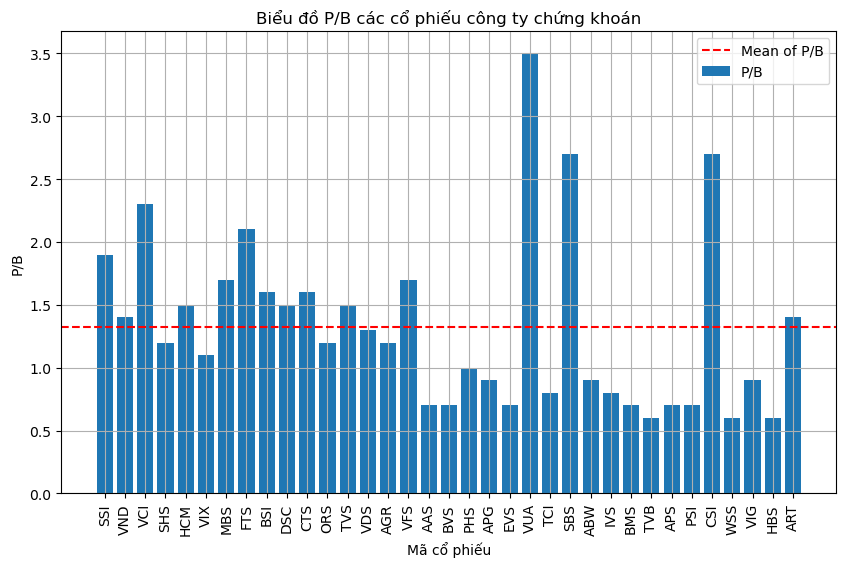

In [18]:
plt.figure(figsize=(10, 6))
plt.bar(dfr_sorted["Mã CP"], dfr_sorted["P/B"], label="P/B")
plt.axhline(y=mean_p_b, color='r', linestyle='--', label="Mean of P/B")

plt.xlabel("Mã cổ phiếu")
plt.ylabel("P/B")
plt.title("Biểu đồ P/B các cổ phiếu công ty chứng khoán")
plt.xticks(rotation=90)
plt.grid()
plt.legend()
plt.show()

According to my observation, companies with small market capitalization often have p/b values that are too low or too high, affecting the average value of the whole industry. Therefore, I only take the 9 companies with the largest market capitalization to compare with each other.

In [19]:
dfr_top9 = dfr_sorted.head(9).reset_index()
dfr_top9

index Mã CP  Vốn hóa (tỷ)  P/B
0      0   SSI       43325.0  1.9
1     34   VND       22530.0  1.4
2     28   VCI       16406.0  2.3
3     23   SHS       12441.0  1.2
4     14   HCM       12345.0  1.5
5     33   VIX        9138.0  1.1
6     25   MBS        8053.0  1.7
7     11   FTS        7724.0  2.1
8      6   BSI        7484.0  1.6

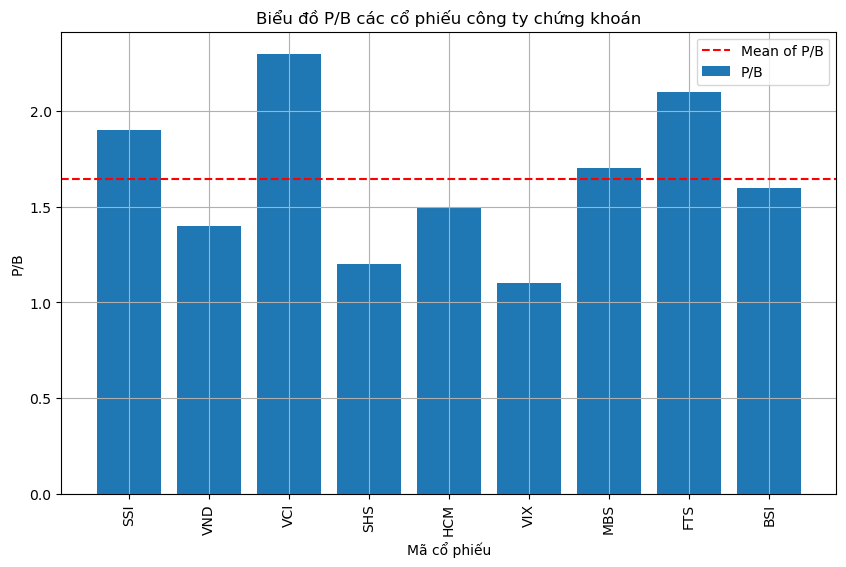

In [20]:
plt.figure(figsize=(10, 6))
plt.bar(dfr_top9["Mã CP"], dfr_top9["P/B"], label="P/B")
plt.axhline(y=dfr_top9["P/B"].mean(), color='r', linestyle='--', label="Mean of P/B")

plt.xlabel("Mã cổ phiếu")
plt.ylabel("P/B")
plt.title("Biểu đồ P/B các cổ phiếu công ty chứng khoán")
plt.xticks(rotation=90)
plt.grid()
plt.legend()
plt.show()

Based on the chart above, we see that the codes “VND”, “SHS”, “HCM”, “VIX” have P/B values lower than the average P/B value of the 9 companies.

Therefore, we will concentrate on a more in-depth analysis of these four stocks.

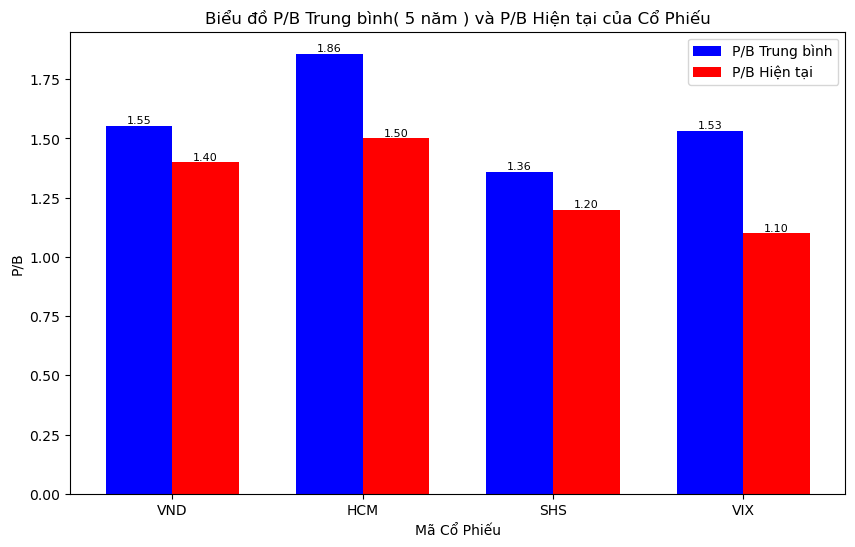

In [61]:
last_stock_list = ["VND", "HCM", "SHS", "VIX"]

data_vnd = vn.stock_evaluation (symbol='VND', period=5, time_window='Y')
data_hcm = vn.stock_evaluation (symbol='HCM', period=5, time_window='Y')
data_shs = vn.stock_evaluation (symbol='SHS', period=5, time_window='Y')
data_vix = vn.stock_evaluation (symbol='VIX', period=5, time_window='Y')

avg_pb_vnd = data_vnd['PB'].mean()
avg_pb_hcm = data_hcm['PB'].mean()
avg_pb_shs = data_shs['PB'].mean()
avg_pb_vix = data_vix['PB'].mean()


# Mã cổ phiếu và giá trị P/B tương ứng
avg_pbs = [avg_pb_vnd, avg_pb_hcm, avg_pb_shs, avg_pb_vix]
current_pbs = [data_vnd['PB'].iloc[-1], 
               data_hcm['PB'].iloc[-1], 
               data_shs['PB'].iloc[-1], 
               data_vix['PB'].iloc[-1]]

# Số lượng mã cổ phiếu
num_stocks = len(last_stock_list)

# Vị trí của mỗi mã cổ phiếu trên biểu đồ
x = range(num_stocks)

# Độ rộng của các cột
width = 0.35

# Tạo biểu đồ
fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ cột cho P/B trung bình
avg_bar = ax.bar(x, avg_pbs, width, label='P/B Trung bình', color='b')

# Vị trí cho cột P/B hiện tại
current_x = [i + width for i in x]

# Vẽ cột cho P/B hiện tại
current_bar = ax.bar(current_x, current_pbs, width, label='P/B Hiện tại', color='r')

# Đặt tên cho các cột
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(last_stock_list)
ax.set_xlabel('Mã Cổ Phiếu')
ax.set_ylabel('P/B')
ax.set_title('Biểu đồ P/B Trung bình( 5 năm ) và P/B Hiện tại của Cổ Phiếu')
ax.legend()

# Hiển thị giá trị trên các cột
for bar in avg_bar + current_bar:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=8)

plt.show()


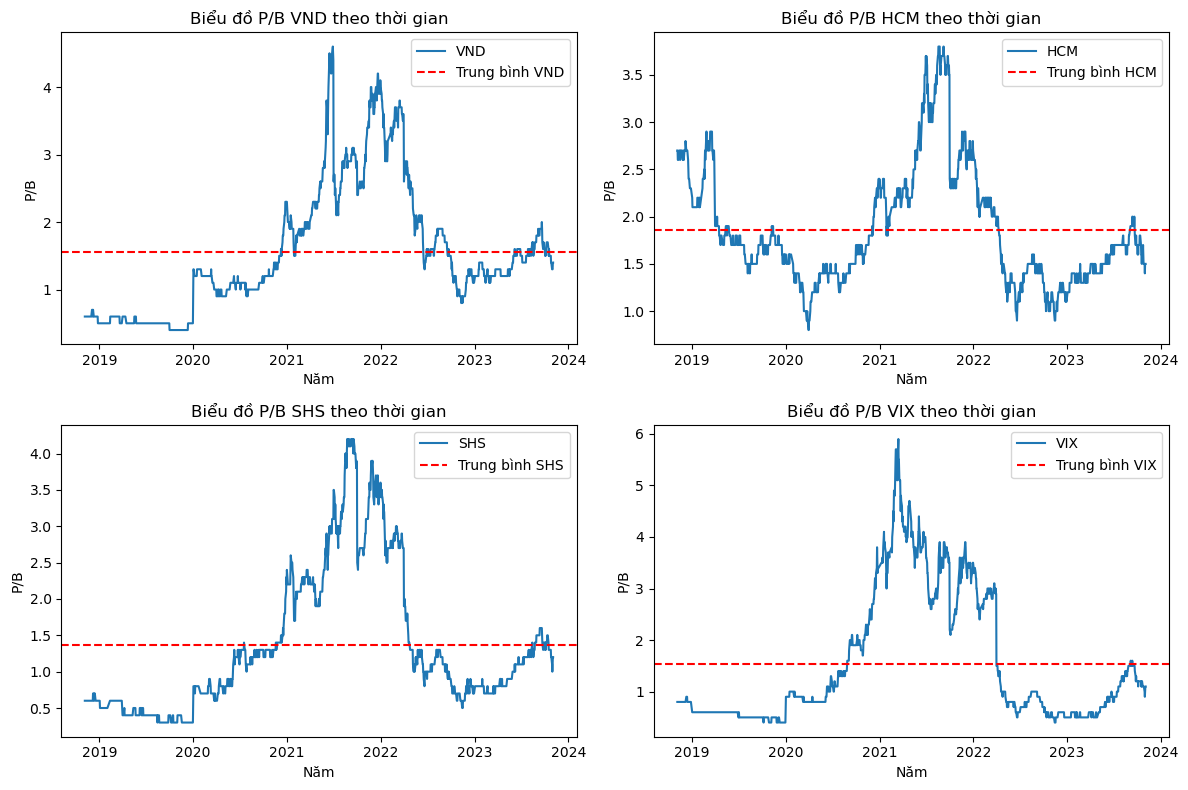

In [62]:
import matplotlib.pyplot as plt

# Tạo một lưới 2x2 cho biểu đồ
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Mã cổ phiếu và dữ liệu P/B tương ứng
pb_data = [data_vnd, data_hcm, data_shs, data_vix]
avg_pbs = [avg_pb_vnd, avg_pb_hcm, avg_pb_shs, avg_pb_vix]

# Vẽ biểu đồ cho từng mã cổ phiếu
for i in range(4):
    row, col = divmod(i, 2)  # Xác định vị trí hàng và cột trong lưới
    ax = axs[row, col]  # Lấy ô tại vị trí đó
    stock = last_stock_list[i]
    data = pb_data[i]
    avg_pb = avg_pbs[i]
    
    ax.plot(data['fromDate'], data['PB'], label=stock)  # Biểu đồ line P/B
    ax.axhline(y=avg_pb, color='r', linestyle='--', label=f"Trung bình {stock}")  # Đường trung bình
    ax.set_xlabel("Năm")
    ax.set_ylabel("P/B")
    ax.set_title(f"Biểu đồ P/B {stock} theo thời gian")
    ax.legend()

# Tạo khoảng trống cho tiêu đề chung của lưới
plt.tight_layout()

plt.show()


In [64]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

start = start.strftime('%Y-%m-%d')
end = end.strftime('%Y-%m-%d')

for stock in last_stock_list:
    # Tạo DataFrame cho cổ phiếu và đặt cột "time" làm index
    stock_data = vn.stock_historical_data(stock, start, end, resolution='1D', type='stock')
    stock_data = stock_data.set_index("time")
    
    # Lưu DataFrame vào biến globals()
    globals()[stock] = stock_data


company_list = [VND, HCM, SHS, VIX]
company_name = ["Chứng khoán VnDirect", "Chứng khoán TP HCM", 
                "Chứng khoán SG - HN", "Chứng khoán VIX" ]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    


In [65]:
df = pd.concat(company_list, axis=0)
#df.time = pd.to_datetime(df.time)
#df = df.set_index("time")
df.tail(10)


open   high    low  close    volume ticker     company_name
time                                                                    
2023-10-23  15000  15100  14300  14400  20967000    VIX  Chứng khoán VIX
2023-10-24  14600  14800  14350  14700  17873900    VIX  Chứng khoán VIX
2023-10-25  14800  15250  14600  14650  24900600    VIX  Chứng khoán VIX
2023-10-26  14250  14300  13650  13650  46463900    VIX  Chứng khoán VIX
2023-10-27  14000  14000  12900  13600  32405600    VIX  Chứng khoán VIX
2023-10-30  13300  13550  12650  12650  21232000    VIX  Chứng khoán VIX
2023-10-31  12600  13000  11800  12050  36020400    VIX  Chứng khoán VIX
2023-11-01  12250  12800  11900  12800  38898700    VIX  Chứng khoán VIX
2023-11-02  13200  13650  13050  13650  34187000    VIX  Chứng khoán VIX
2023-11-03  13800  14100  13400  13650  39567500    VIX  Chứng khoán VIX

In [67]:
VND.describe()

open          high           low         close        volume
count    251.000000    251.000000    251.000000    251.000000  2.510000e+02
mean   17036.972112  17393.422311  16666.171315  17007.844622  2.682667e+07
std     3444.267875   3469.180965   3387.939174   3415.299199  1.309932e+07
min     9120.000000  10200.000000   9120.000000   9720.000000  6.799000e+06
25%    14700.000000  14950.000000  14350.000000  14625.000000  1.754475e+07
50%    16000.000000  16400.000000  15700.000000  15950.000000  2.491390e+07
75%    19625.000000  20000.000000  19300.000000  19625.000000  3.385690e+07
max    25200.000000  25600.000000  24700.000000  25250.000000  1.058780e+08

In [68]:
HCM.describe()

open          high           low         close        volume
count    251.000000    251.000000    251.000000    251.000000  2.510000e+02
mean   25910.996016  26387.330677  25393.864542  25860.557769  6.047549e+06
std     4307.325412   4266.673792   4301.555789   4279.781173  2.662628e+06
min    13790.000000  15810.000000  13790.000000  14800.000000  1.664500e+06
25%    23145.000000  23520.000000  22730.000000  23045.000000  4.053850e+06
50%    25430.000000  25870.000000  25040.000000  25380.000000  5.498200e+06
75%    29700.000000  30275.000000  28975.000000  29675.000000  7.239900e+06
max    35900.000000  36150.000000  35000.000000  35850.000000  1.667700e+07

In [69]:
SHS.describe()

open          high           low         close        volume
count    251.000000    251.000000    251.000000    251.000000  2.510000e+02
mean   11958.565737  12328.685259  11680.478088  12013.545817  2.048640e+07
std     3713.741555   3752.744844   3620.670845   3691.186229  9.921385e+06
min     4900.000000   5900.000000   4900.000000   5400.000000  3.768100e+06
25%     8850.000000   9200.000000   8600.000000   8900.000000  1.355930e+07
50%    10800.000000  11100.000000  10600.000000  10800.000000  1.875020e+07
75%    15100.000000  15500.000000  14900.000000  15200.000000  2.491470e+07
max    20600.000000  20700.000000  19800.000000  20500.000000  6.971370e+07

In [70]:
VIX.describe()

open          high           low         close        volume
count    251.000000    251.000000    251.000000    251.000000  2.510000e+02
mean   10216.529880  10451.545817   9948.800797  10209.442231  1.957568e+07
std     4552.002205   4636.458701   4401.447598   4543.495536  1.186520e+07
min     4280.000000   4770.000000   4280.000000   4600.000000  2.264300e+06
25%     6350.000000   6480.000000   6235.000000   6335.000000  1.042460e+07
50%     8220.000000   8430.000000   8100.000000   8230.000000  1.702810e+07
75%    14225.000000  14550.000000  13825.000000  14275.000000  2.515455e+07
max    20600.000000  20750.000000  19750.000000  20600.000000  6.855130e+07

In [71]:
VIX.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 2022-11-04 to 2023-11-03
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   open          251 non-null    int32 
 1   high          251 non-null    int32 
 2   low           251 non-null    int32 
 3   close         251 non-null    int32 
 4   volume        251 non-null    int64 
 5   ticker        251 non-null    object
 6   company_name  251 non-null    object
dtypes: int32(4), int64(1), object(2)
memory usage: 11.8+ KB


## Closing Price

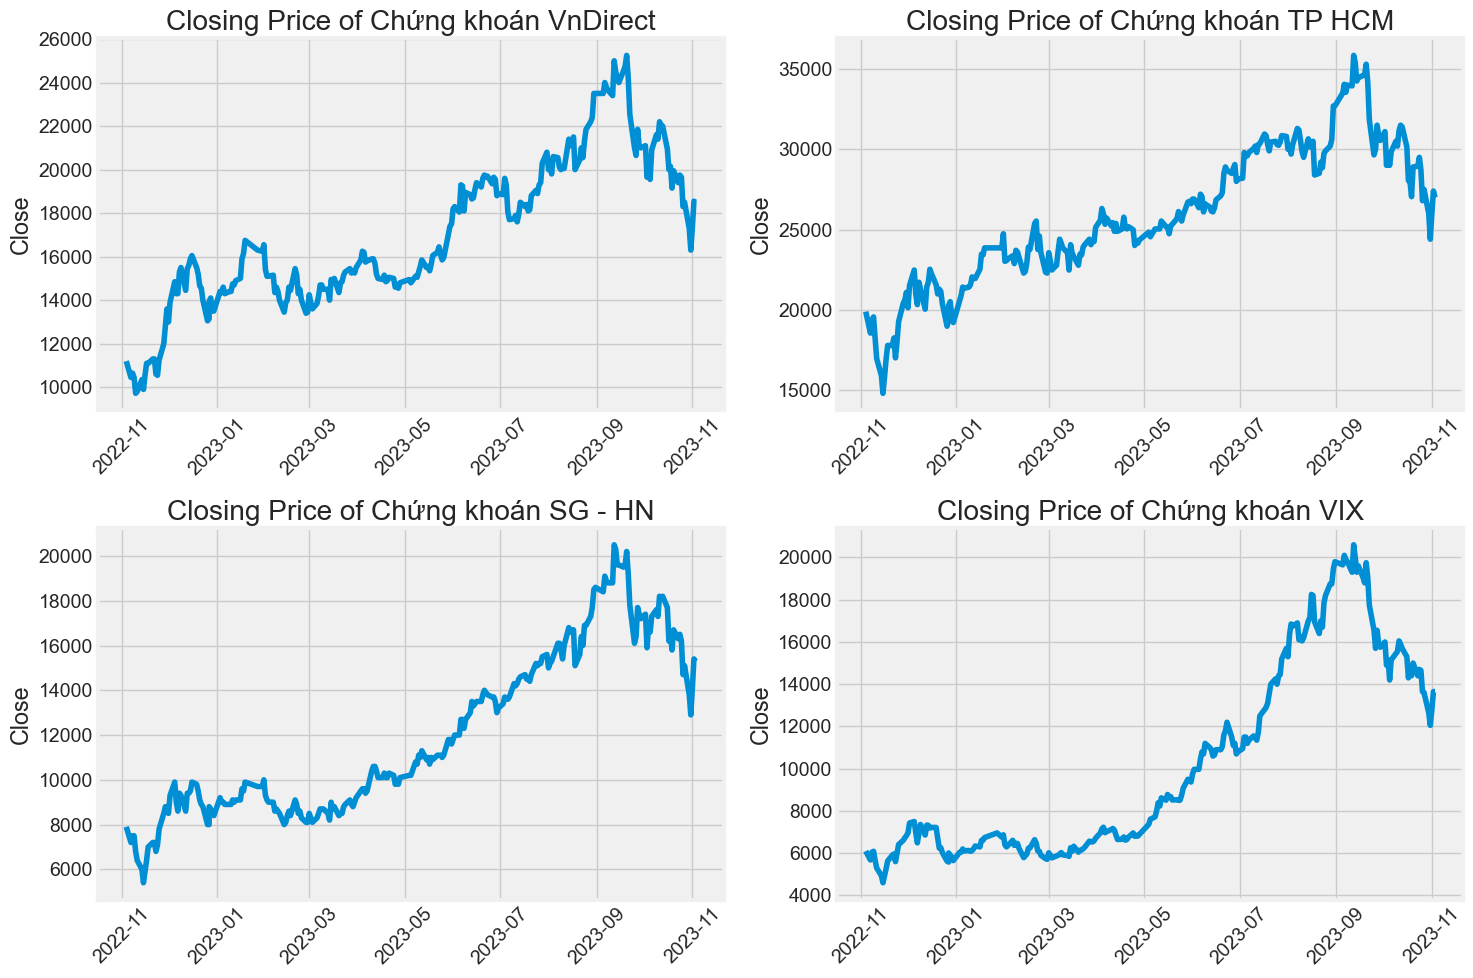

In [72]:
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    ax = plt.plot(company['close'] )
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.xticks(rotation = 45)
    plt.title(f"Closing Price of {company_name[i - 1]}")
    
plt.tight_layout()

## Volume of Sales

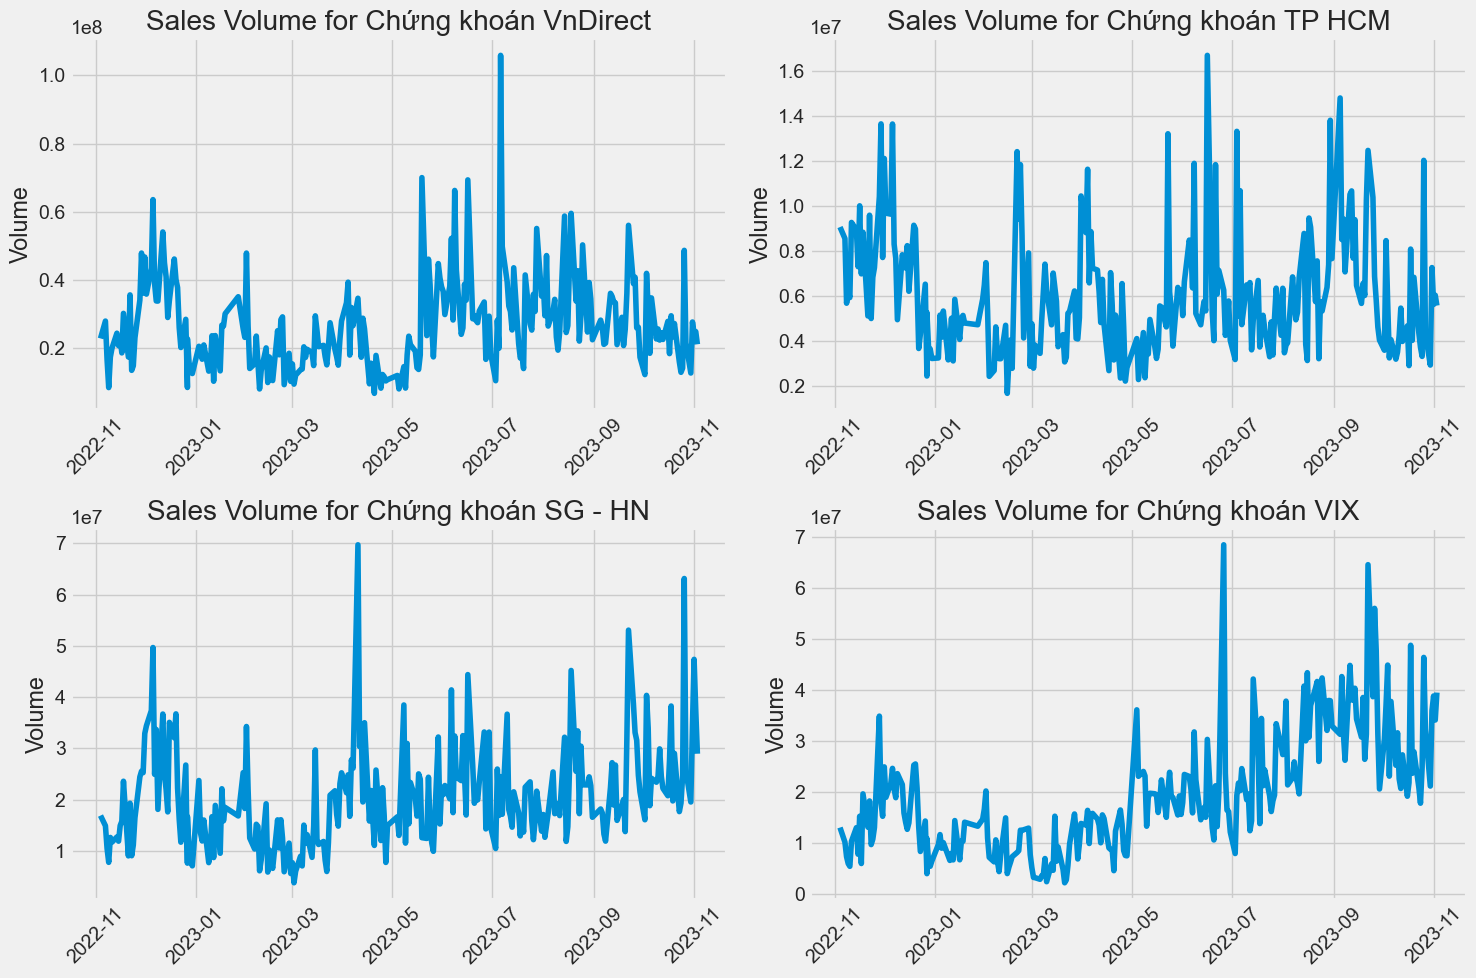

In [73]:
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    ax = plt.plot(company['volume'] )
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.xticks(rotation = 45)
    plt.title(f"Sales Volume for {company_name[i - 1]}")
    
plt.tight_layout()

## Moving average

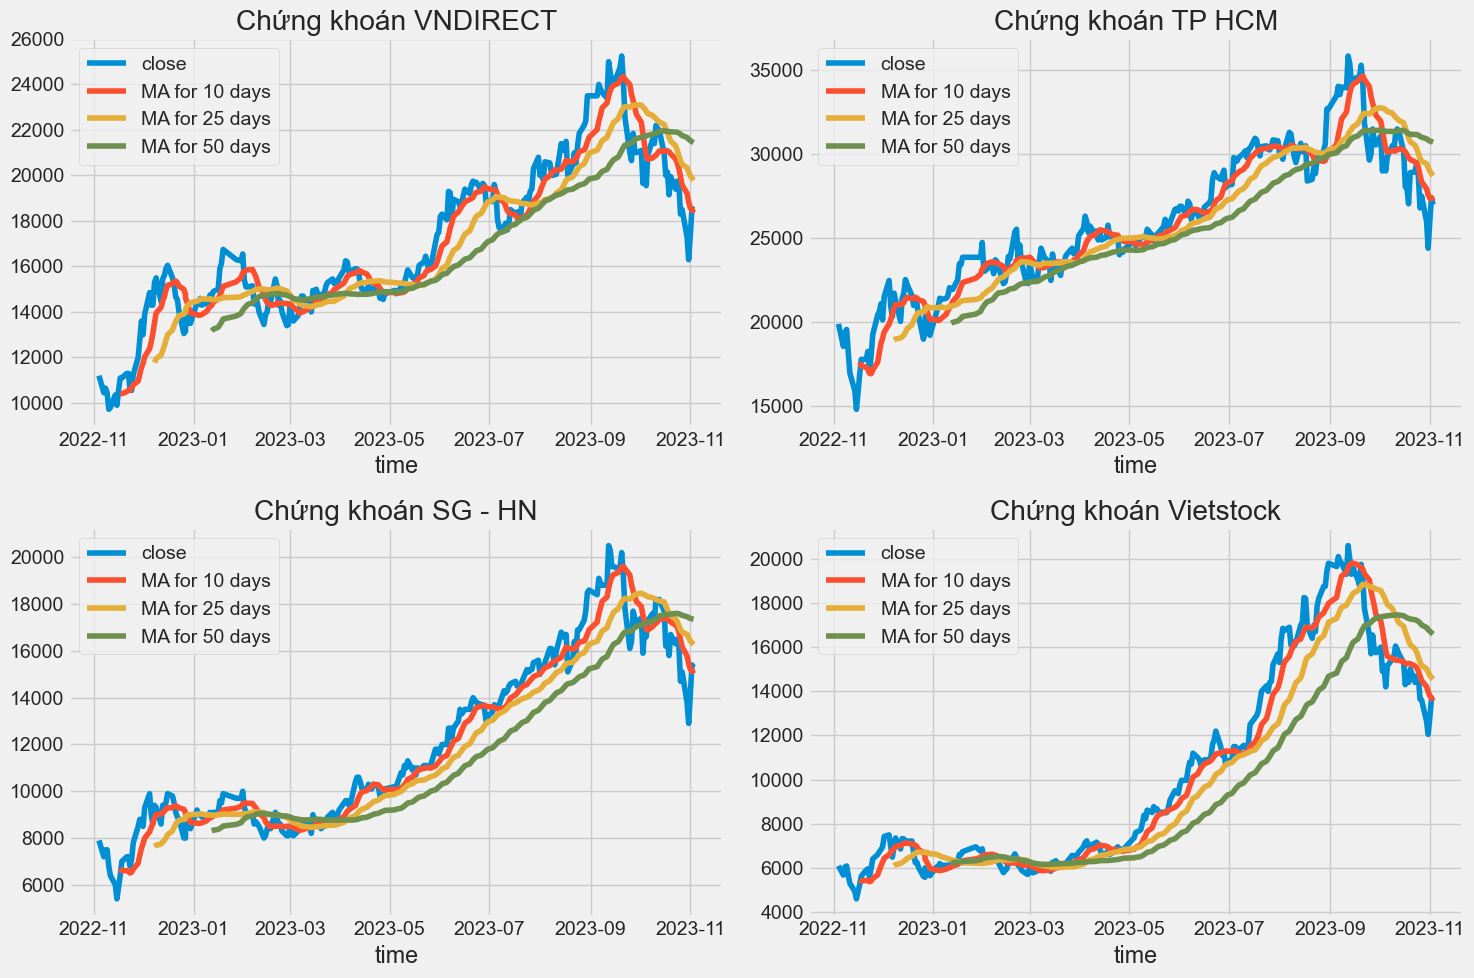

In [76]:
ma_day = [10, 25, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

VND[['close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Chứng khoán VNDIRECT')

HCM[['close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Chứng khoán TP HCM')

SHS[['close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Chứng khoán SG - HN')

VIX[['close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Chứng khoán Vietstock')

fig.tight_layout()

## The daily return of the stock on average

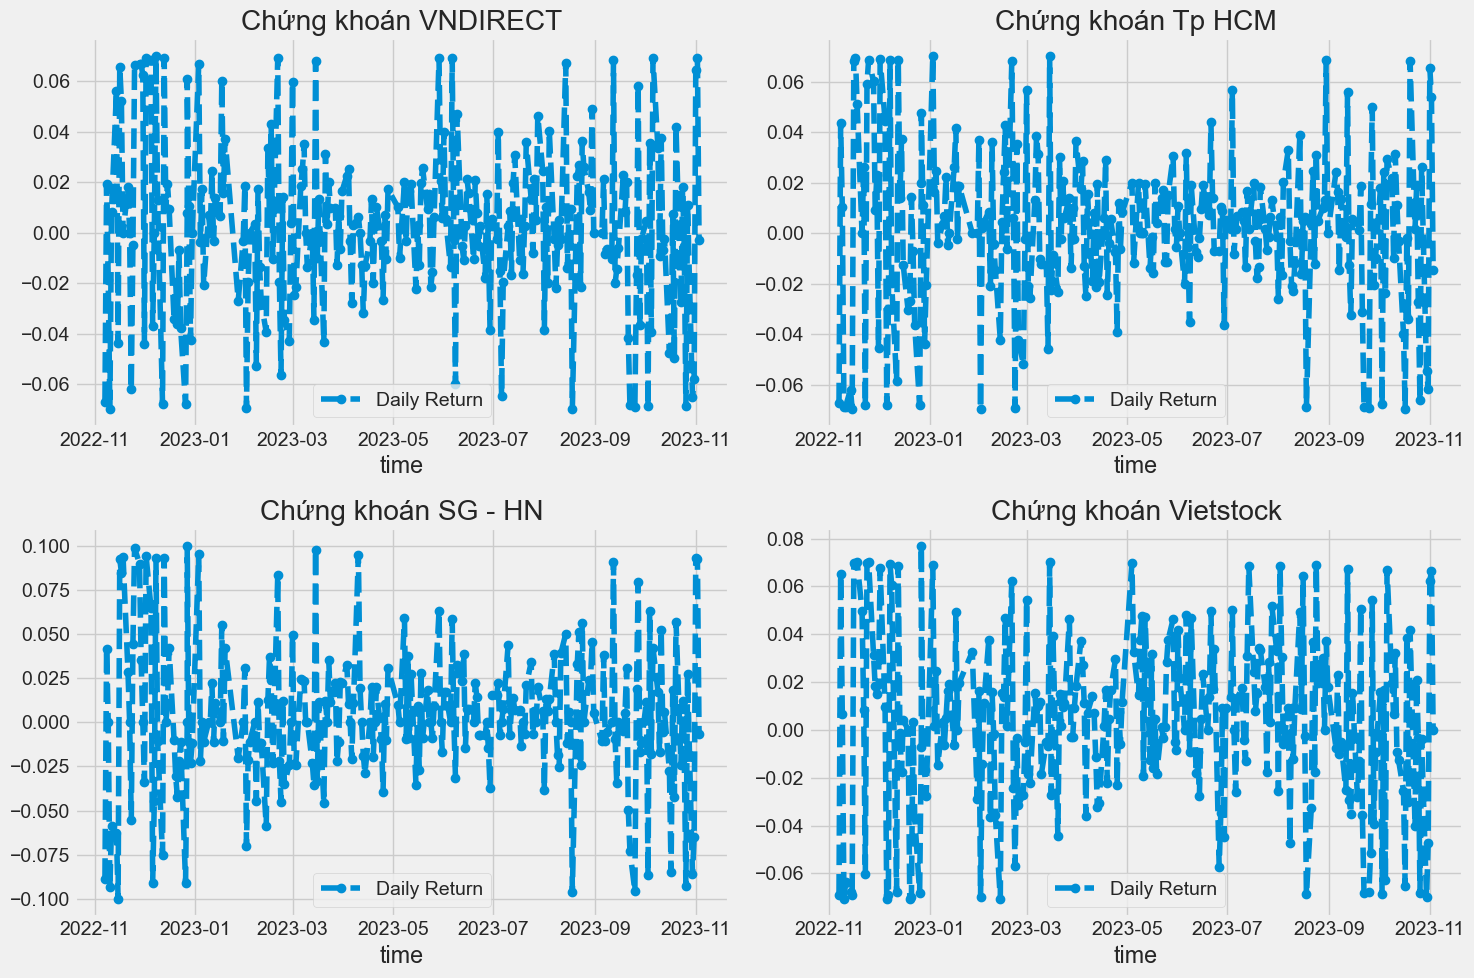

In [77]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

VND['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Chứng khoán VNDIRECT')

HCM['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Chứng khoán Tp HCM')

SHS['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('Chứng khoán SG - HN')

VIX['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Chứng khoán Vietstock')

fig.tight_layout()

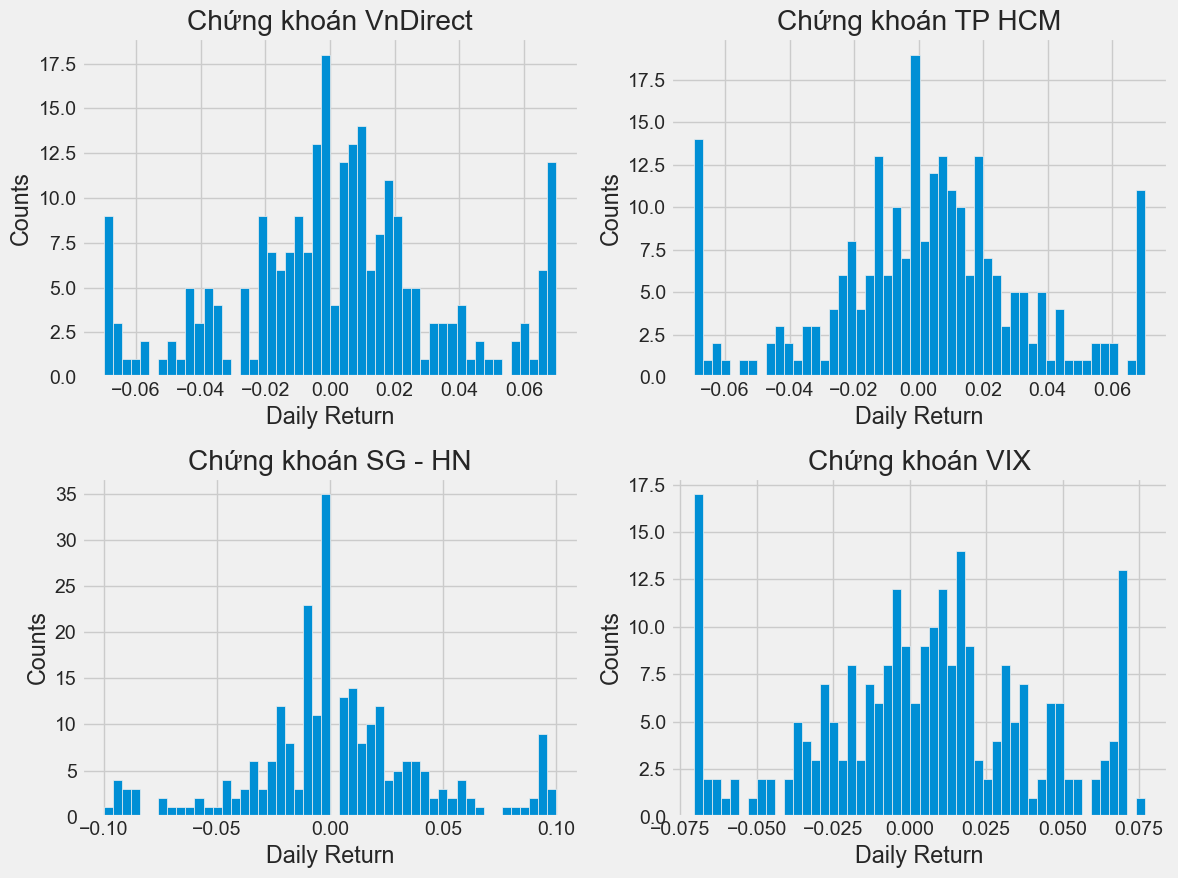

In [78]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

## The correlation between different stocks closing prices

In [79]:
df

open   high    low  close    volume ticker          company_name
time                                                                         
2022-11-04  11750  11800  11150  11200  22894900    VND  Chứng khoán VnDirect
2022-11-07  11200  11300  10450  10450  27986600    VND  Chứng khoán VnDirect
2022-11-08   9790  10650   9790  10650  16698900    VND  Chứng khoán VnDirect
2022-11-09  10750  11000  10400  10450   8485700    VND  Chứng khoán VnDirect
2022-11-10  10150  10300   9720   9720  17433600    VND  Chứng khoán VnDirect
...           ...    ...    ...    ...       ...    ...                   ...
2023-10-30  13300  13550  12650  12650  21232000    VIX       Chứng khoán VIX
2023-10-31  12600  13000  11800  12050  36020400    VIX       Chứng khoán VIX
2023-11-01  12250  12800  11900  12800  38898700    VIX       Chứng khoán VIX
2023-11-02  13200  13650  13050  13650  34187000    VIX       Chứng khoán VIX
2023-11-03  13800  14100  13400  13650  39567500    VIX       Chứng khoán VIX

[1004 rows x 7 columns]

In [80]:
df2 = df.reset_index()
df2

time   open   high    low  close    volume ticker  \
0     2022-11-04  11750  11800  11150  11200  22894900    VND   
1     2022-11-07  11200  11300  10450  10450  27986600    VND   
2     2022-11-08   9790  10650   9790  10650  16698900    VND   
3     2022-11-09  10750  11000  10400  10450   8485700    VND   
4     2022-11-10  10150  10300   9720   9720  17433600    VND   
...          ...    ...    ...    ...    ...       ...    ...   
999   2023-10-30  13300  13550  12650  12650  21232000    VIX   
1000  2023-10-31  12600  13000  11800  12050  36020400    VIX   
1001  2023-11-01  12250  12800  11900  12800  38898700    VIX   
1002  2023-11-02  13200  13650  13050  13650  34187000    VIX   
1003  2023-11-03  13800  14100  13400  13650  39567500    VIX   

              company_name  
0     Chứng khoán VnDirect  
1     Chứng khoán VnDirect  
2     Chứng khoán VnDirect  
3     Chứng khoán VnDirect  
4     Chứng khoán VnDirect  
...                    ...  
999        Chứng khoán VIX  
1000       Chứng khoán VIX  
1001       Chứng khoán VIX  
1002       Chứng khoán VIX  
1003       Chứng khoán VIX  

[1004 rows x 8 columns]

In [82]:
# Tạo DataFrame cho từng ticker
df_VND = df2[df2['ticker'] == 'VND'][['time', 'close']].set_index('time').rename(columns={'close': 'VND'})
df_HCM = df2[df2['ticker'] == 'HCM'][['time', 'close']].set_index('time').rename(columns={'close': 'HCM'})
df_SHS = df2[df2['ticker'] == 'SHS'][['time', 'close']].set_index('time').rename(columns={'close': 'SHS'})
df_VIX = df2[df2['ticker'] == 'VIX'][['time', 'close']].set_index('time').rename(columns={'close': 'VIX'})

# Kết hợp các DataFrame theo cột 'time'
closing_df = pd.concat([df_VND, df_HCM, df_SHS, df_VIX], axis=1)

# Hiển thị DataFrame mới
closing_df


VND    HCM    SHS    VIX
time                                  
2022-11-04  11200  19890   7900   6100
2022-11-07  10450  18550   7200   5680
2022-11-08  10650  19360   7500   6050
2022-11-09  10450  19560   7500   6090
2022-11-10   9720  18210   6800   5660
...           ...    ...    ...    ...
2023-10-30  17300  26000  13800  12650
2023-10-31  16300  24400  12900  12050
2023-11-01  17350  26000  14100  12800
2023-11-02  18550  27400  15400  13650
2023-11-03  18500  27000  15300  13650

[251 rows x 4 columns]

In [83]:
stock_rets = closing_df.pct_change()
stock_rets

VND       HCM       SHS       VIX
time                                              
2022-11-04       NaN       NaN       NaN       NaN
2022-11-07 -0.066964 -0.067371 -0.088608 -0.068852
2022-11-08  0.019139  0.043666  0.041667  0.065141
2022-11-09 -0.018779  0.010331  0.000000  0.006612
2022-11-10 -0.069856 -0.069018 -0.093333 -0.070608
...              ...       ...       ...       ...
2023-10-30 -0.064865 -0.054545 -0.086093 -0.069853
2023-10-31 -0.057803 -0.061538 -0.065217 -0.047431
2023-11-01  0.064417  0.065574  0.093023  0.062241
2023-11-02  0.069164  0.053846  0.092199  0.066406
2023-11-03 -0.002695 -0.014599 -0.006494  0.000000

[251 rows x 4 columns]

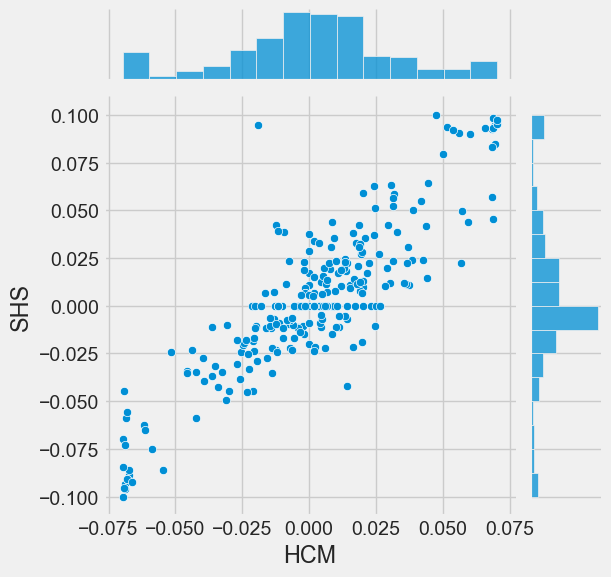

In [85]:
sns.jointplot(x='HCM', y='SHS', data=stock_rets.reset_index(), kind='scatter')

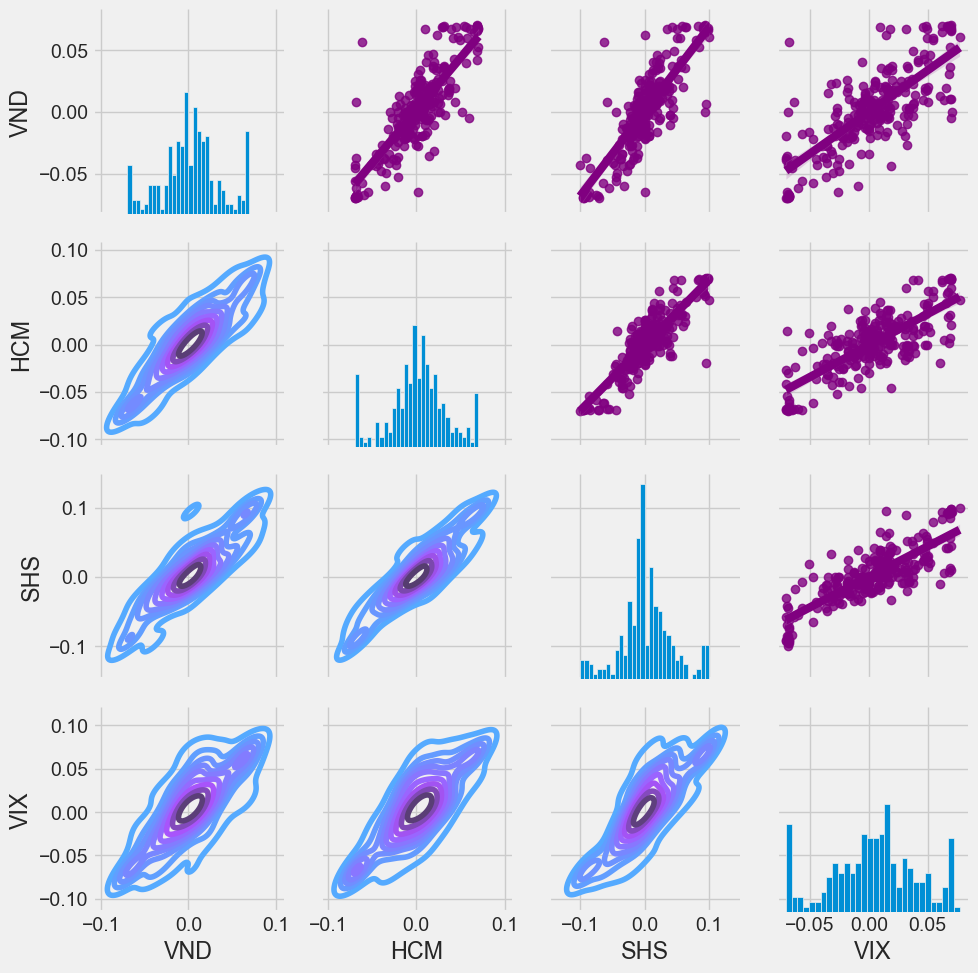

In [86]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(stock_rets.reset_index().dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(sns.regplot, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

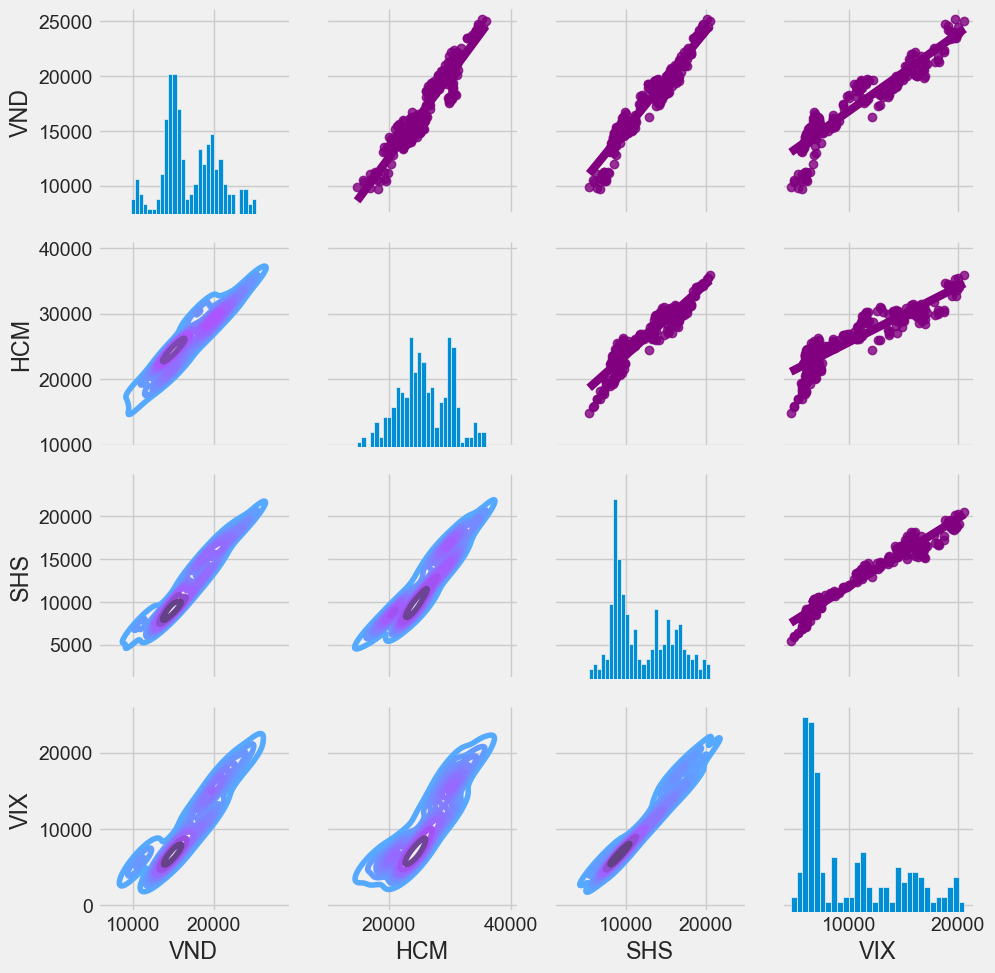

In [87]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(closing_df.reset_index())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(sns.regplot, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)


Text(0.5, 1.0, 'Correlation of stock closing price')

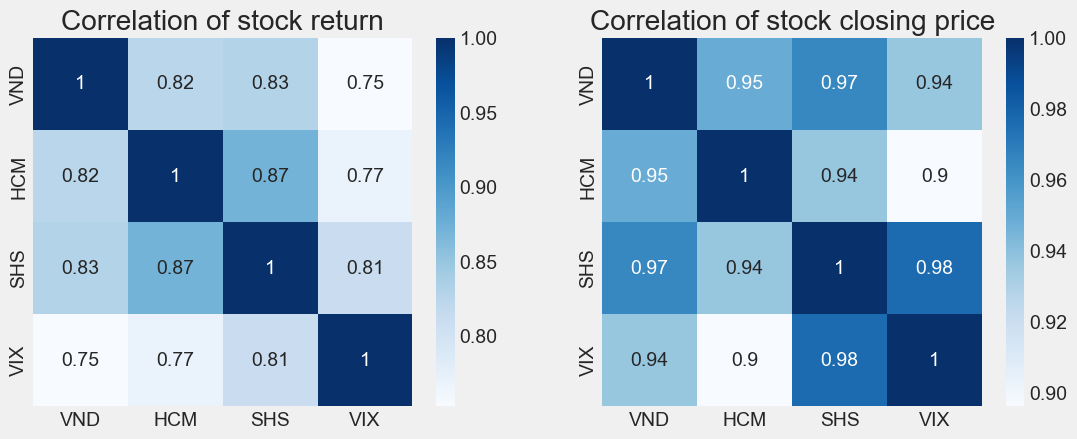

In [88]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(stock_rets.corr(), annot=True, cmap='Blues')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='Blues')
plt.title('Correlation of stock closing price')

Through correlation analysis, it is shown that the prices of the four securities companies are positively correlated with each other.

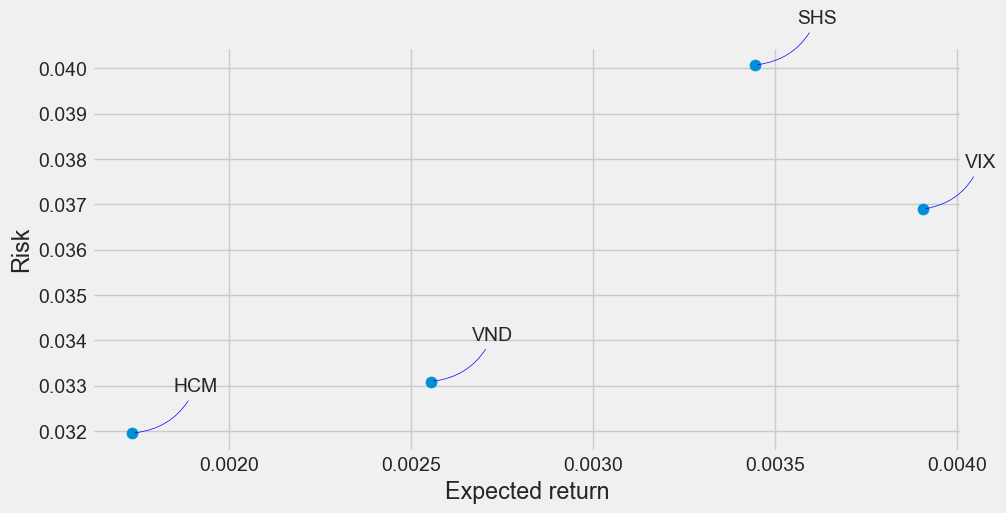

In [89]:
rets = stock_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 5))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(30, 30), 
                 textcoords='offset points', 
                 arrowprops=dict(arrowstyle='-', 
                                 color='blue', 
                                 connectionstyle='arc3,rad=-0.3')
                )


In [90]:
end = datetime.now()
start = datetime(end.year - 11, end.month, end.day)

start = start.strftime('%Y-%m-%d')
end = end.strftime('%Y-%m-%d')

data = vn.stock_historical_data('VIX', start, end, resolution='1D',
                                type='stock').set_index("time")
data.head()


open  high   low  close  volume ticker
time                                              
2012-11-05  1150  1150  1150   1150     600    VIX
2012-11-06  1180  1200  1180   1200    1200    VIX
2012-11-07  1200  1230  1200   1230     700    VIX
2012-11-08  1230  1230  1230   1230     600    VIX
2012-11-09  1230  1230  1230   1230       0    VIX

In [91]:
# Adding indicators
data['EMAF']=ta.ema(data.close, length=20)
data['EMAM']=ta.ema(data.close, length=100)
data['EMAS']=ta.ema(data.close, length=150)


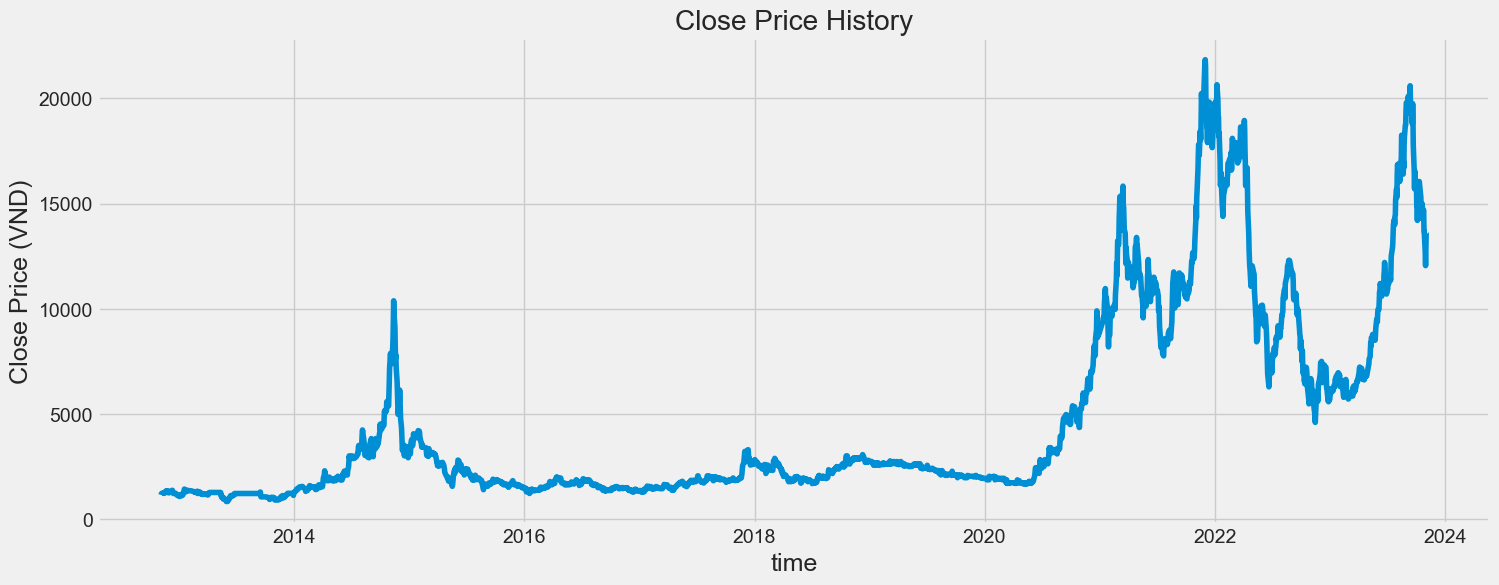

In [92]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(data['close'])
plt.xlabel('time', fontsize=18)
plt.ylabel('Close Price (VND)', fontsize=18)
plt.show()

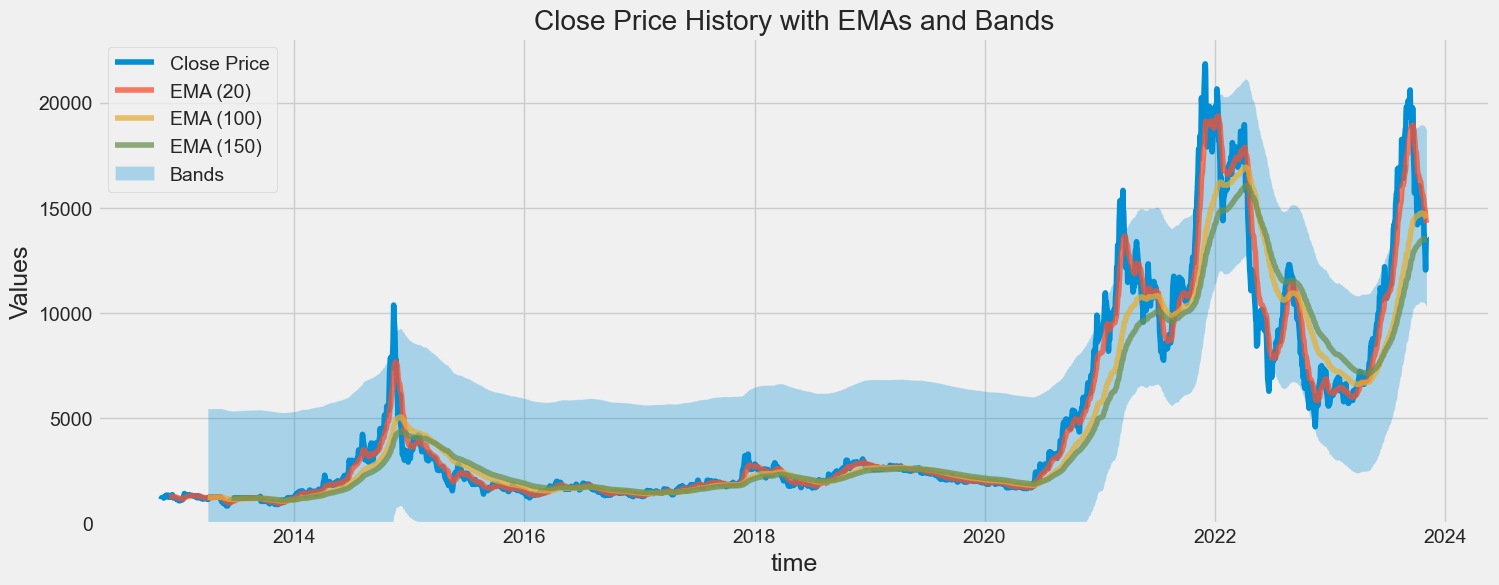

In [93]:
plt.figure(figsize=(16, 6))
plt.title('Close Price History with EMAs and Bands')
plt.plot(data['close'], label='Close Price')

# Plot EMAs with reduced opacity
plt.plot(data['EMAF'], label='EMA (20)', alpha=0.75)
plt.plot(data['EMAM'], label='EMA (100)', alpha=0.75)
plt.plot(data['EMAS'], label='EMA (150)', alpha=0.75)

# Calculate upper and lower bands with 1 standard deviation
upper_band = data['EMAM'] + data['EMAM'].std()
lower_band = data['EMAM'] - data['EMAM'].std()

# Plot upper and lower bands
plt.fill_between(data.index, upper_band, lower_band, alpha=0.3, label='Bands')

plt.xlabel('time', fontsize=18)

plt.ylabel('Values', fontsize=18)
plt.ylim(0, None)
plt.legend(loc='upper left')
plt.show()


In [94]:
# Drop duplicate indices

data = data.loc[~data.index.duplicated(keep='first')]  

# Set the frequency to daily and forward fill missing values

data = data.asfreq('D', method='ffill')

data.close

time
2012-11-05     1150
2012-11-06     1200
2012-11-07     1230
2012-11-08     1230
2012-11-09     1230
              ...  
2023-10-30    12650
2023-10-31    12050
2023-11-01    12800
2023-11-02    13650
2023-11-03    13650
Freq: D, Name: close, Length: 4016, dtype: int32

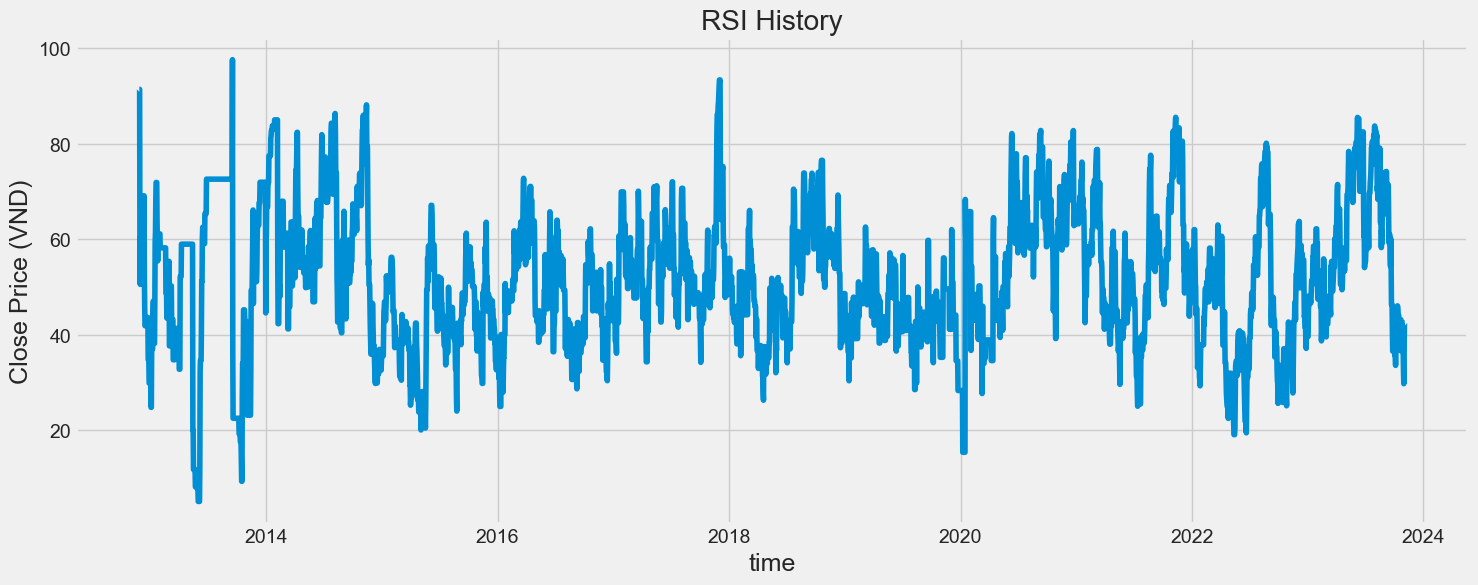

In [95]:
plt.figure(figsize=(16,6))
plt.title('RSI History')
plt.plot(data['RSI'])
plt.xlabel('time', fontsize=18)
plt.ylabel('Close Price (VND)', fontsize=18)
plt.show()

<Figure size 640x480 with 0 Axes>

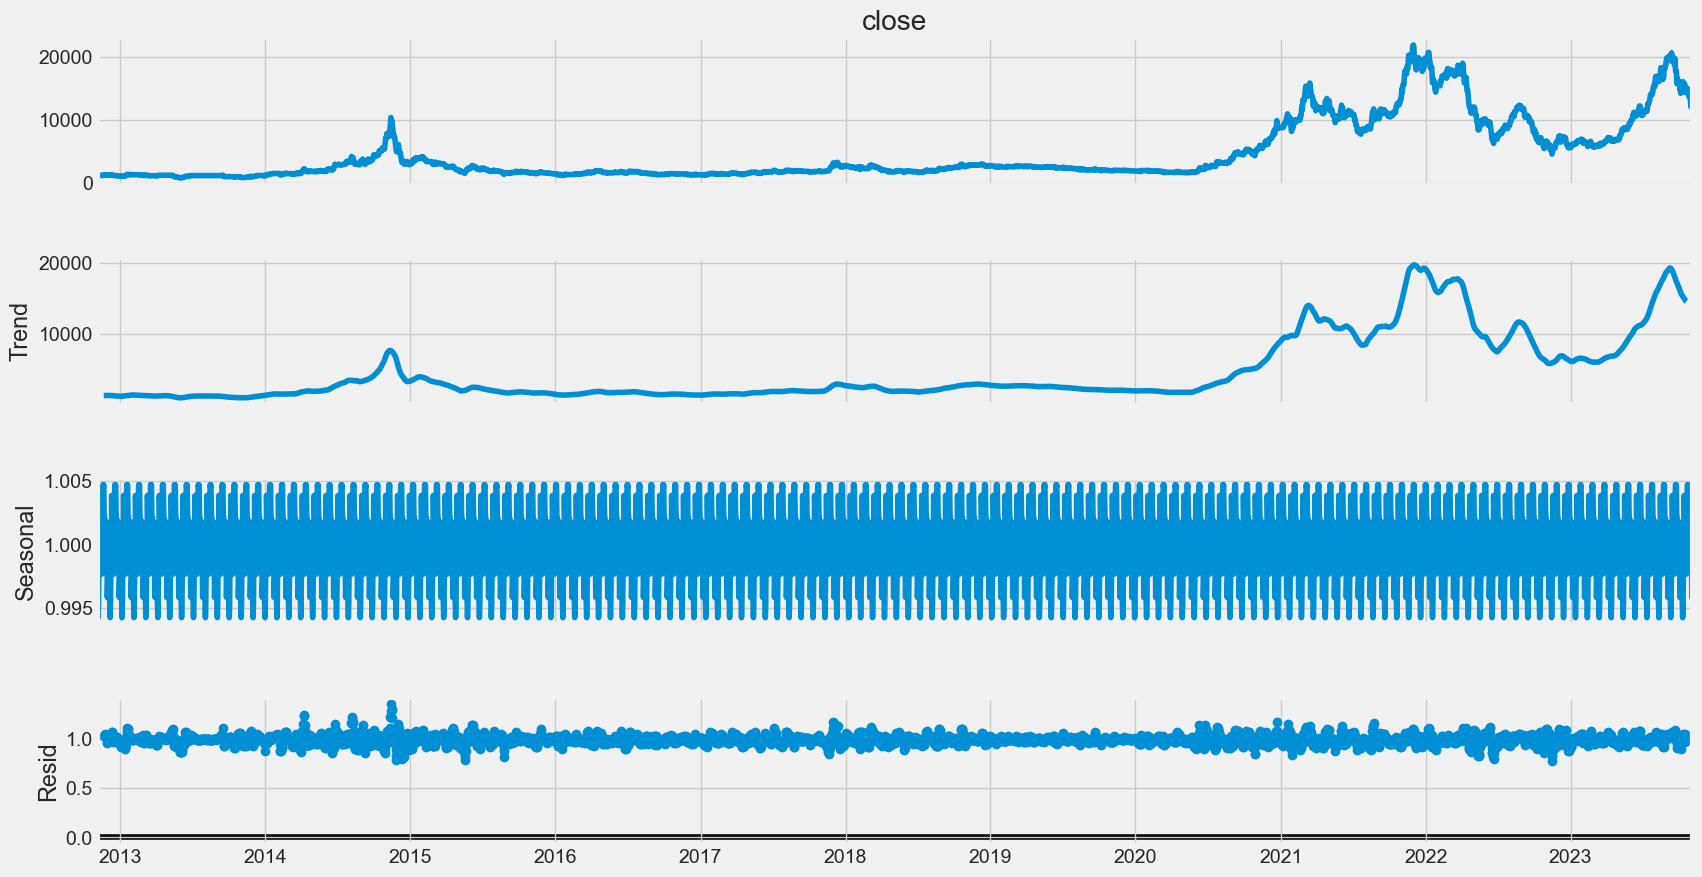

In [96]:
# Checking decomposition of trend, seasonality and residue of the original time seires.
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['close'], 
                                   model='multiplicative', period=30)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(20, 10)

ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -1.571357
p-value: 0.497964
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
KPSS Test:
Null Hypothesis: Stationary
KPSS Statistic: 5.481732
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\Admin\AppData\Local\Temp\ipykernel_16240\4138709452.py:28: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(stock_close_price, regression='c', nlags=None, store=False)


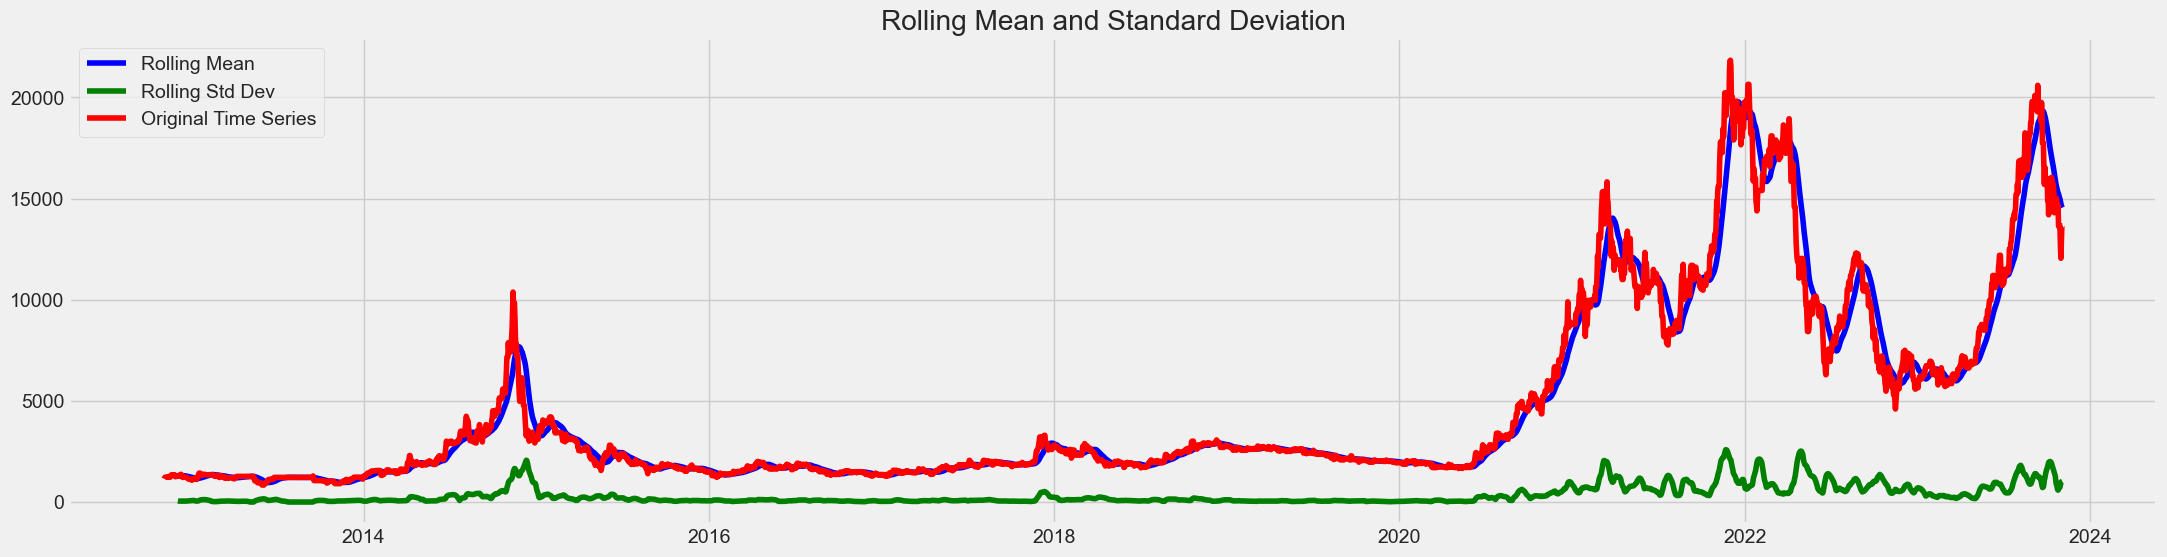

In [97]:
#Testing for stationarity using ADF and KPSS Tests.
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

def stationarity_test(stock_close_price):
    # Calculating rolling mean and rolling standard deviation:
    rolling_mean = stock_close_price.rolling(30).mean()
    rolling_std_dev = stock_close_price.rolling(30).std()
  
    # Plotting the statistics:
    plt.figure(figsize=(24,6))
    plt.plot(rolling_mean, color='blue', label='Rolling Mean')
    plt.plot(rolling_std_dev, color='green', label = 'Rolling Std Dev')
    plt.plot(stock_close_price, color='red',label='Original Time Series')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    
    print("ADF Test:")
    adf_test = adfuller(stock_close_price,autolag='AIC')
    print('Null Hypothesis: Not Stationary')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t%s: %.3f' % (key, value))

    print("KPSS Test:")
    kpss_test = kpss(stock_close_price, regression='c', nlags=None, store=False)
    print('Null Hypothesis: Stationary')
    print('KPSS Statistic: %f' % kpss_test[0])
    print('p-value: %f' % kpss_test[1])
    print('Critical Values:')
    for key, value in kpss_test[3].items():
        print('\t%s: %.3f' % (key, value))
    
stationarity_test(data['close'])

ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -1.042829
p-value: 0.737325
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
KPSS Test:
Null Hypothesis: Stationary
KPSS Statistic: 6.568055
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\Admin\AppData\Local\Temp\ipykernel_16240\1171929005.py:29: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(stock_close_price, regression='c', nlags=None, store=False)


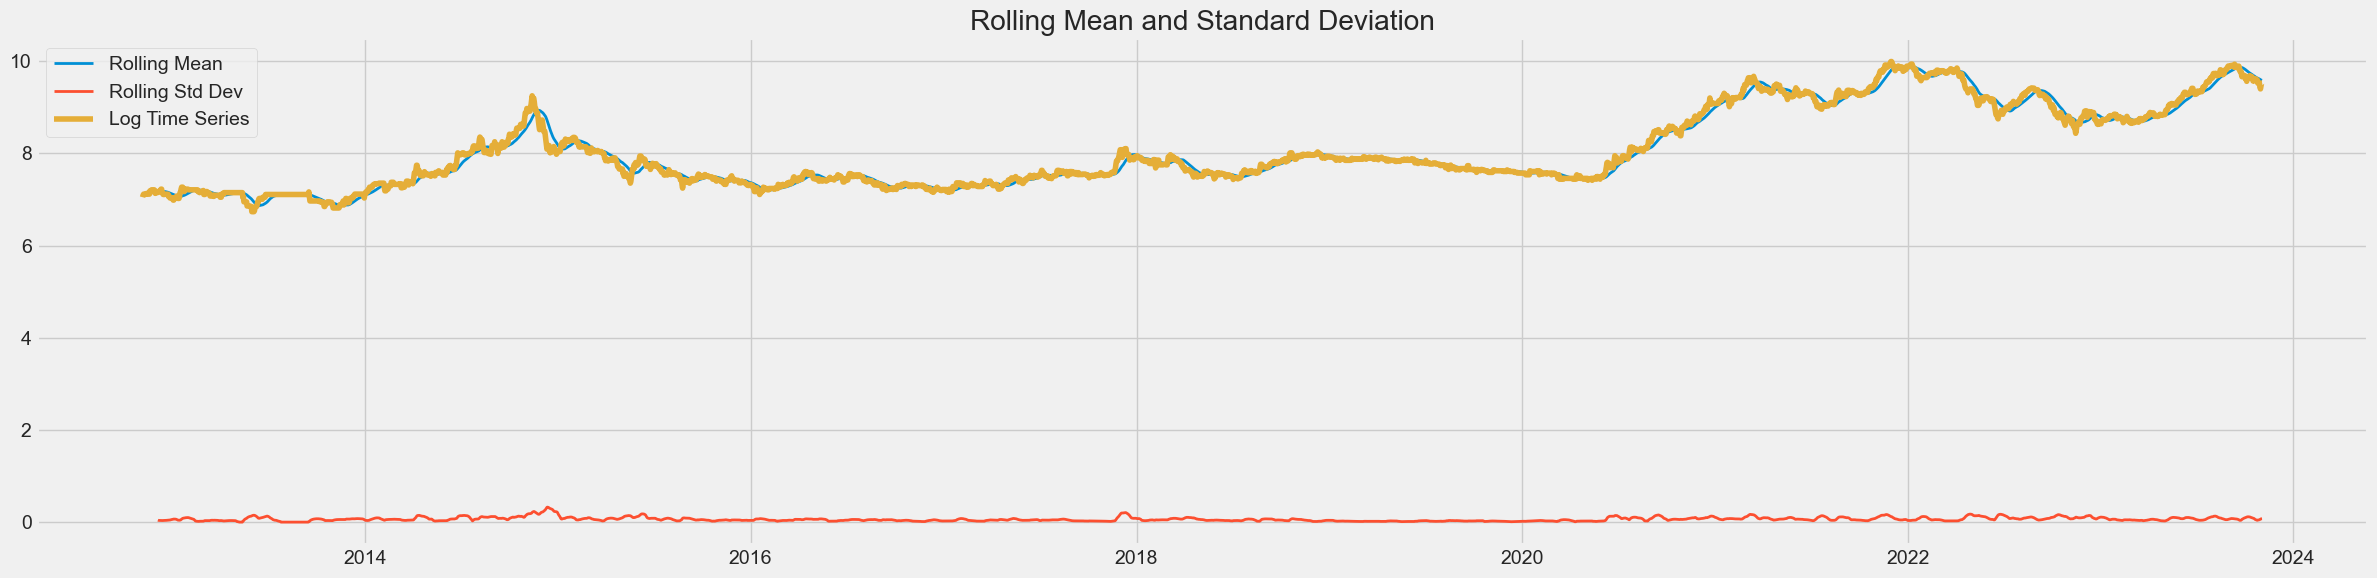

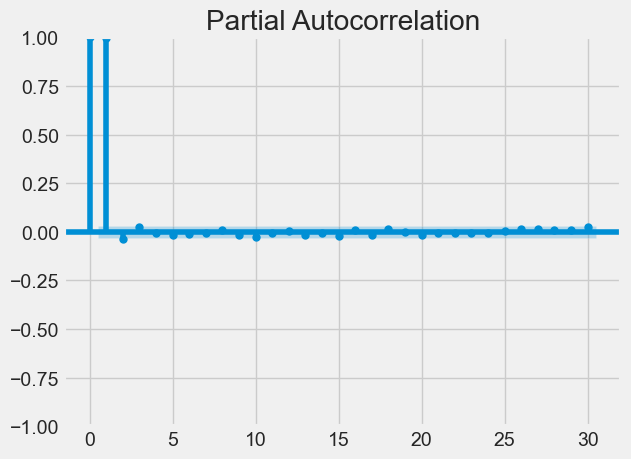

In [98]:
#Testing for stationarity of de-trended time series using ADF and KPSS Tests.

data['Close_Log'] = np.log(data['close'])

def stationarity_test(stock_close_price):
    # Calculating rolling mean and rolling standard deviation:
    rolling_mean = stock_close_price.rolling(30).mean()
    rolling_std_dev = stock_close_price.rolling(30).std()
  
    # Plotting the statistics:
    plt.figure(figsize=(24,6))
    plt.plot(rolling_mean, label='Rolling Mean',linewidth=2.0)
    plt.plot(rolling_std_dev, label = 'Rolling Std Dev',linewidth=2.0)
    plt.plot(stock_close_price,label='Log Time Series')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.tight_layout()
    
    print("ADF Test:")
    adf_test = adfuller(stock_close_price,autolag='AIC')
    print('Null Hypothesis: Not Stationary')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t%s: %.3f' % (key, value))

    print("KPSS Test:")
    kpss_test = kpss(stock_close_price, regression='c', nlags=None, store=False)
    print('Null Hypothesis: Stationary')
    print('KPSS Statistic: %f' % kpss_test[0])
    print('p-value: %f' % kpss_test[1])
    print('Critical Values:')
    for key, value in kpss_test[3].items():
        print('\t%s: %.3f' % (key, value))

stationarity_test(data['Close_Log'].dropna())

# PACF Plot
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(data['Close_Log'].dropna(), lags=30)

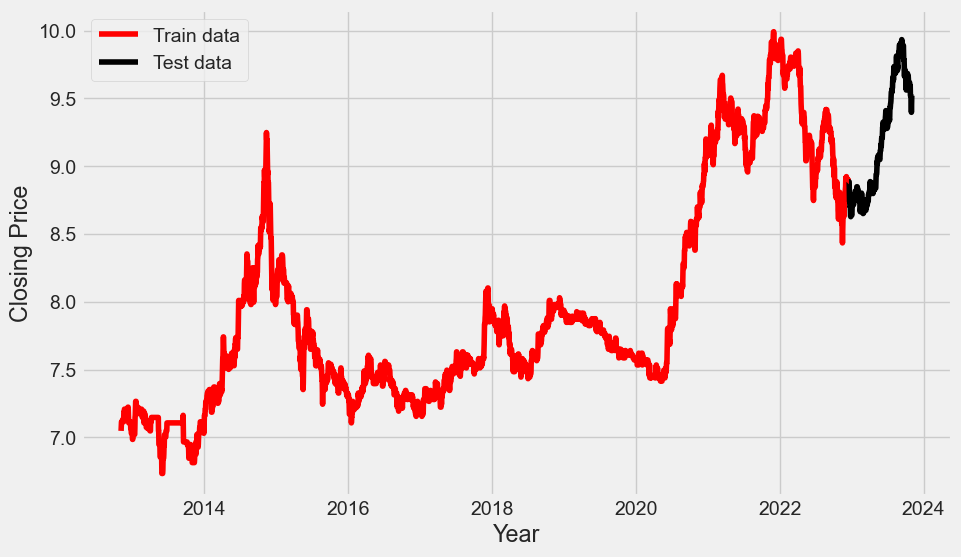

In [99]:
#split data into train and training set
Stock_data_arima = data['Close_Log']
test_size = int(len(Stock_data_arima)*0.08
                            
                            )
train_data, test_data = Stock_data_arima[:-test_size], Stock_data_arima[-test_size:]


# Plotting the train and test sets.
plt.figure(figsize=(10,6))
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.plot(train_data, 'red', label='Train data')
plt.plot(test_data, 'black', label='Test data')
plt.legend()

In [100]:
from pmdarima import auto_arima
from math import *
from statsmodels.tsa.arima.model import ARIMA


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-15542.949, Time=0.72 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-15568.953, Time=1.47 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-15570.004, Time=1.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-15543.899, Time=0.42 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-15569.599, Time=0.72 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-15569.025, Time=1.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-15567.546, Time=1.77 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-15571.111, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-15570.673, Time=1.01 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-15570.081, Time=1.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-15570.068, Time=0.78 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-15568.495, Time=0.72 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 11.676 seconds
                               SARIMAX Results                 

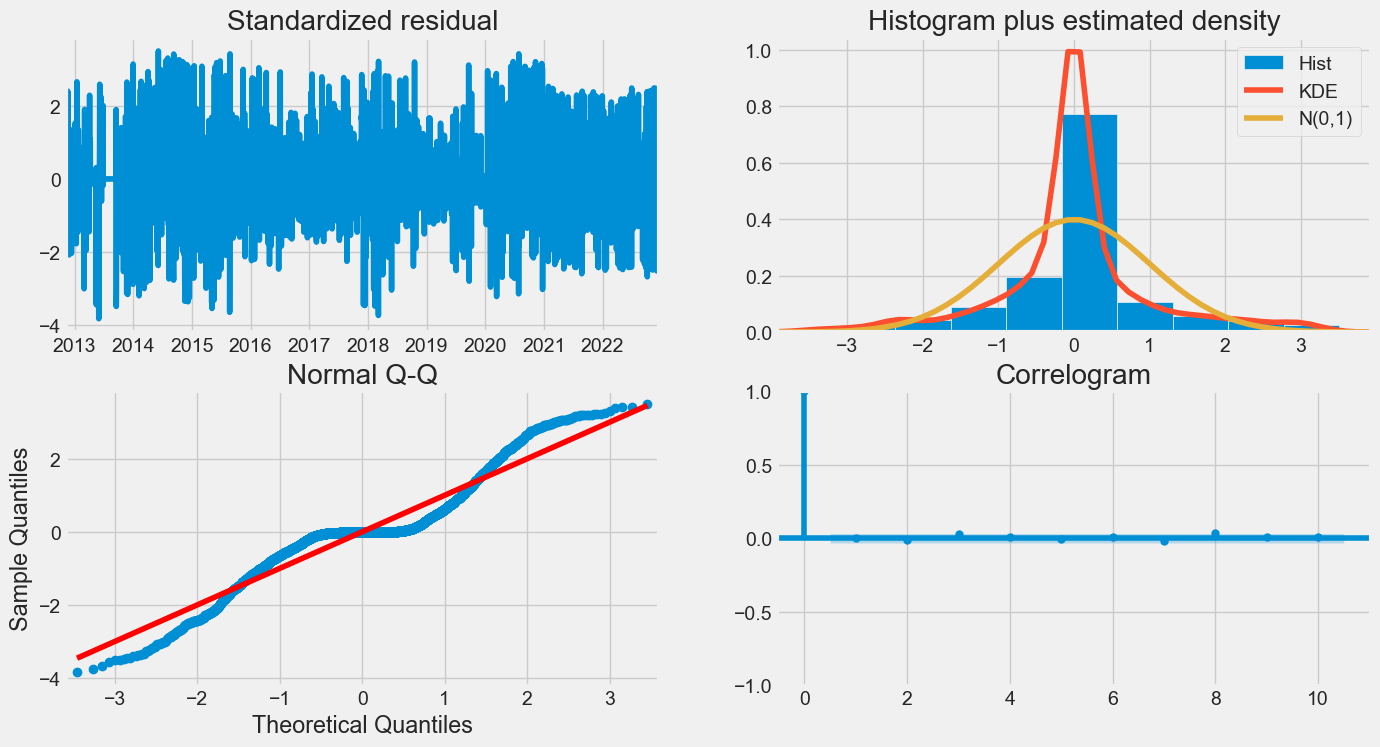

In [101]:
model = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())
model.plot_diagnostics(figsize=(15,8))
plt.show()

In [102]:
# Forecast
fc, conf = model.predict(n = len(test_data), alpha=0.05, return_conf_int=True)  # 95% conf

In [103]:
prediction, confint = model.predict(n_periods= test_size, alpha=0.05, return_conf_int=True)


In [104]:
cf= pd.DataFrame(confint)

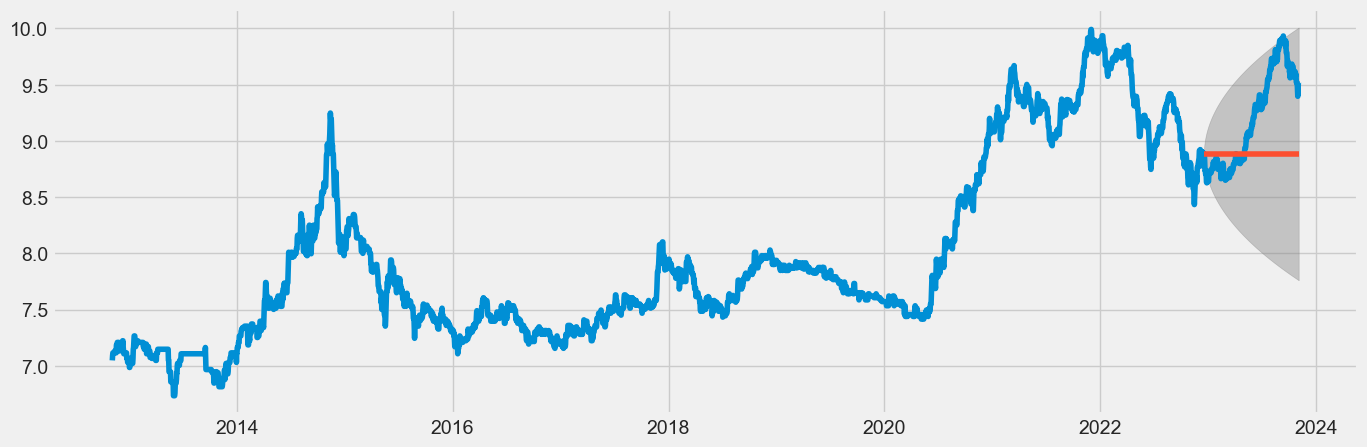

In [105]:
prediction_series = pd.Series(prediction,index=test_data.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(Stock_data_arima)
ax.plot(prediction_series)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.4)

In [106]:
def calcsmape(actual, forecast):
    return 1/len(actual) * np.sum(2 * np.abs(forecast-actual) / (np.abs(actual) + np.abs(forecast)))

In [107]:
smape=calcsmape(test_data,prediction)
smape

0.04436151392418085

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-16931.422, Time=0.80 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-16954.813, Time=1.59 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-16955.700, Time=2.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-16931.655, Time=0.43 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-16955.450, Time=0.93 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-16954.730, Time=1.79 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-16952.845, Time=2.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-16956.179, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-16955.874, Time=1.51 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-16955.137, Time=2.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-16955.302, Time=0.53 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-16953.207, Time=1.04 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 15.592 seconds
                               SARIMAX Results                 

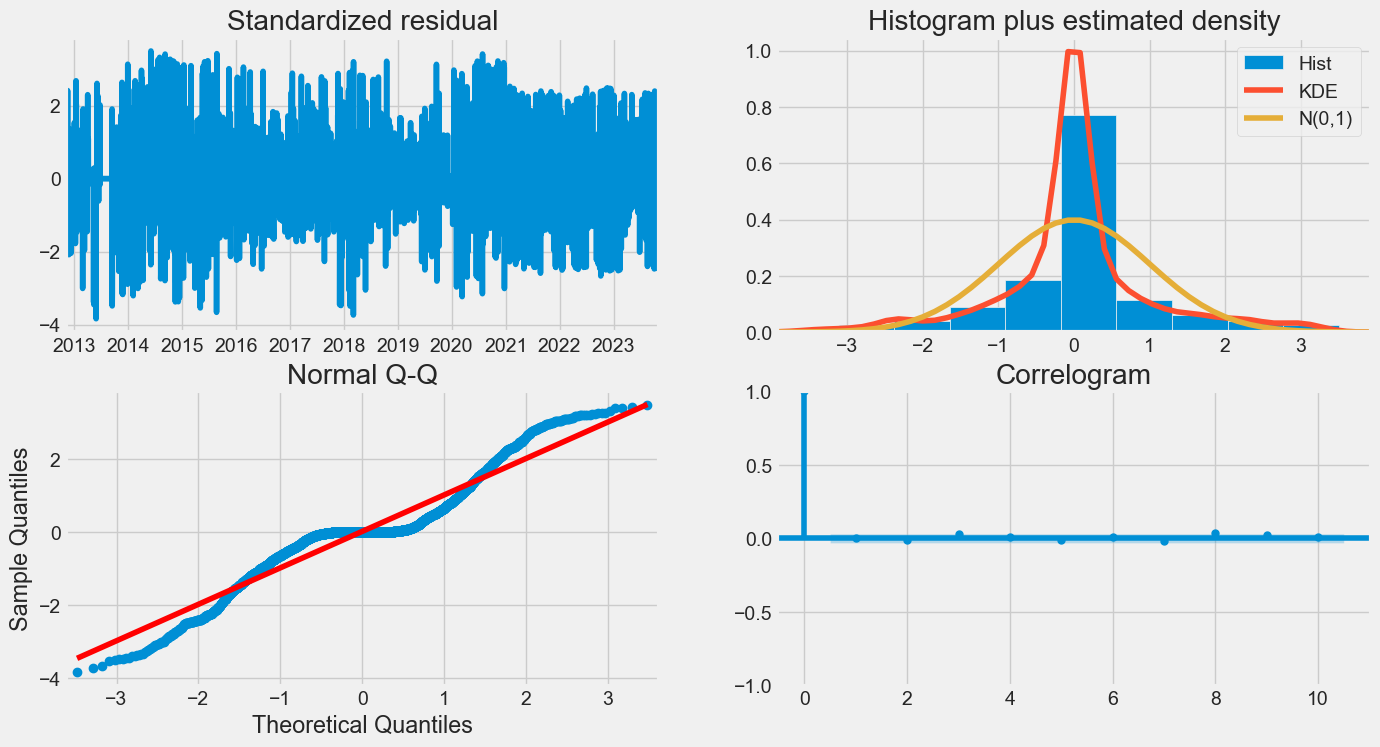

In [124]:
model = auto_arima(Stock_data_arima, start_p=0, start_q=0,
                   test='adf',
                   max_p=3, max_q=3,
                   m=1,
                   d=None,
                   seasonal=False,
                   start_P=0,
                   D=0,
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

print(model.summary())
model.plot_diagnostics(figsize=(15, 8))
plt.show()

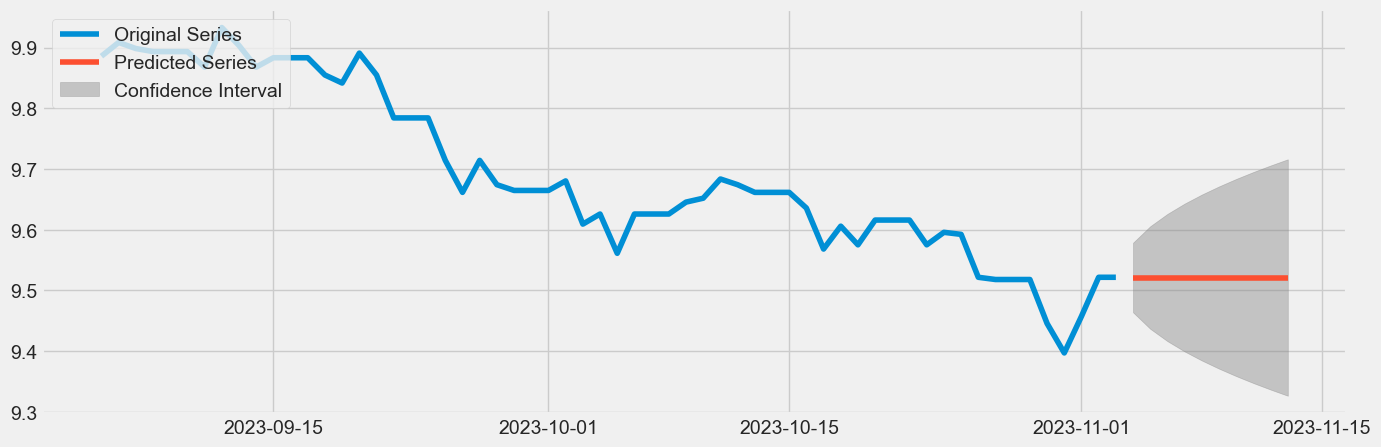

In [129]:
# Predict the next 180 days
forecast, confint = model.predict(n_periods=10, 
                                  alpha=0.05, 
                                  return_conf_int=True)

# Create a DataFrame for confidence intervals
cf = pd.DataFrame(confint, columns=['lower', 'upper'])

# Create a time index for the next 180 days
next_10_days_index = pd.date_range(start=Stock_data_arima.index[-1] 
                                    + pd.DateOffset(1), 
                                    periods=10)

# Create a Series for the prediction with the new time index
prediction_series = pd.Series(forecast, index=next_10_days_index)

# Plot the original series and the predicted series with confidence intervals
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(Stock_data_arima[-60:], label='Original Series')
ax.plot(prediction_series, label='Predicted Series')
ax.fill_between(prediction_series.index, 
                cf['lower'], cf['upper'], 
                color='grey', alpha=0.4, 
                label='Confidence Interval')
ax.legend(loc = 'upper left')
plt.show()


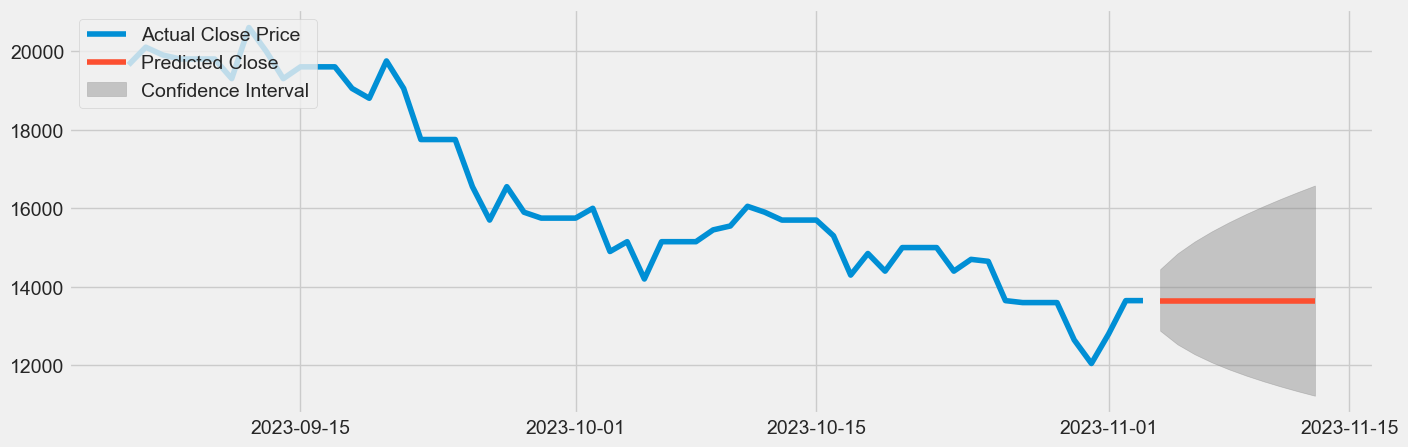

In [137]:
# Plot the Actual Close Price and the Predicted Close Price with confidence intervals
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(data.close[-60:], label='Actual Close Price')
ax.plot(next_10_days_index, 
        np.exp(prediction_series), 
        label='Predicted Close')
ax.fill_between(next_10_days_index, 
                np.exp(cf['lower']), np.exp(cf['upper']), 
                color='grey', alpha=0.4, 
                label='Confidence Interval')
ax.legend(loc = 'upper left')
plt.show()

In [138]:
returns =  100* data.close.pct_change().dropna()

Text(0.5, 1.0, 'VIX Returns')

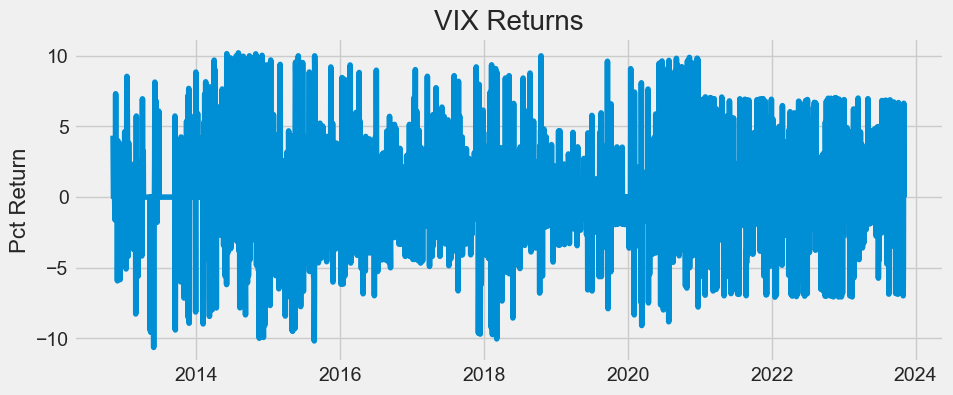

In [139]:

plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('VIX Returns', fontsize=20)

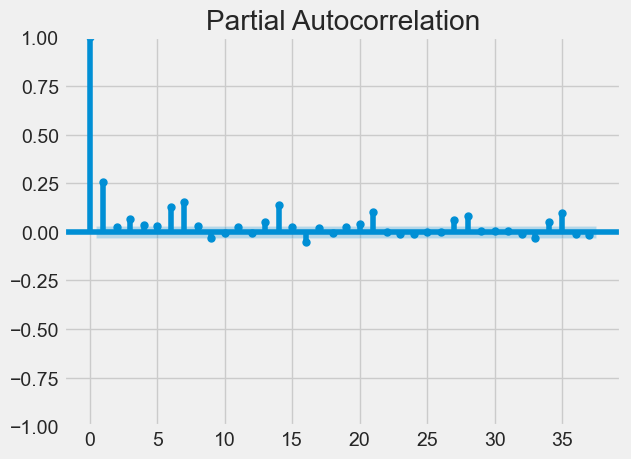

In [140]:
plot_pacf(returns**2)
plt.show()

In [141]:
from arch import arch_model
model = arch_model(returns, p=1, q=1)

In [142]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 27426.75752288194
Iteration:      2,   Func. Count:     14,   Neg. LLF: 11141.331963509658
Iteration:      3,   Func. Count:     22,   Neg. LLF: 16970.42920889146
Iteration:      4,   Func. Count:     30,   Neg. LLF: 10076.90459135836
Iteration:      5,   Func. Count:     38,   Neg. LLF: 9782.213559138325
Iteration:      6,   Func. Count:     43,   Neg. LLF: 9782.212958771292
Iteration:      7,   Func. Count:     48,   Neg. LLF: 9782.212955498137
Iteration:      8,   Func. Count:     53,   Neg. LLF: 9782.212955222256
Optimization terminated successfully    (Exit mode 0)
            Current function value: 9782.212955222256
            Iterations: 8
            Function evaluations: 53
            Gradient evaluations: 8


In [143]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -9782.21
Distribution:                  Normal   AIC:                           19572.4
Method:            Maximum Likelihood   BIC:                           19597.6
                                        No. Observations:                 4015
Date:                Sun, Nov 05 2023   Df Residuals:                     4014
Time:                        00:16:15   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0897  4.190e-02      2.142  3.222e-02 [7.615e-03,  0.172]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.2229      0.210      1.063      0.288   [ -0.188,  0.634]
alpha[1]       0.0596  2.658e-02      2.244  2.483e-02 [7.549e-03,  0.112]
beta[1]        0.9150  5.009e-02     18.265  1.583e-74   [  0.817,  1.013]
==========================================================================

Covariance estimator: robust
"""

In [144]:
rolling_predictions = []
test_size = 365*2

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [145]:
rolling_predictions = pd.Series(rolling_predictions, 
                                index=returns.index[-365*2:])

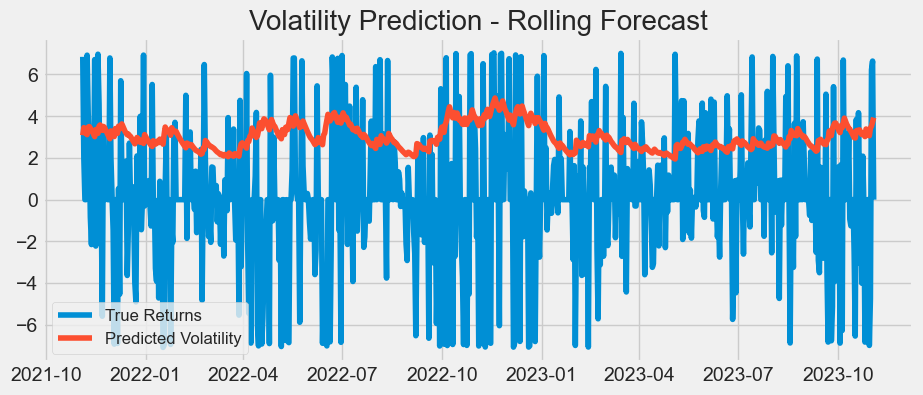

In [146]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*2:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'],
           loc = 'lower left', fontsize=12)

In [147]:
from datetime import timedelta

pred = model_fit.forecast(horizon=10)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,11)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 10 Days')

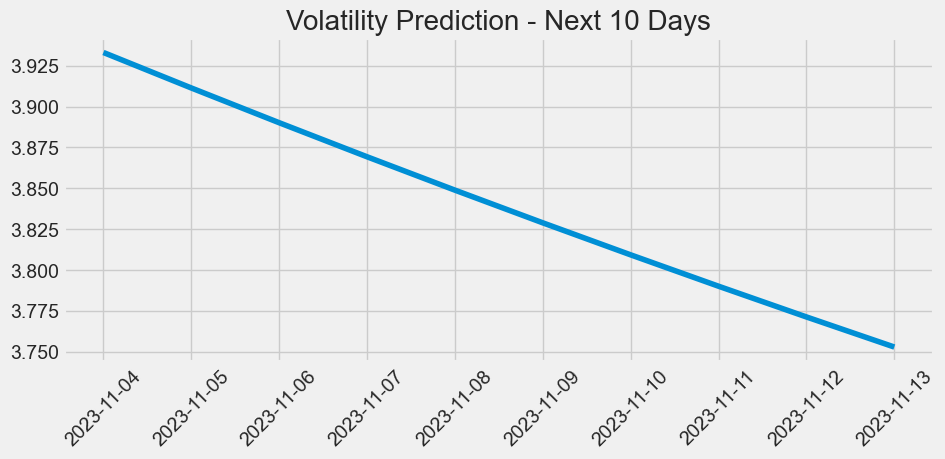

In [148]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.xticks(rotation = 45)
plt.title('Volatility Prediction - Next 10 Days', fontsize=20)